# Portofolio: A/B Testing - Strategic Recommendations for Customer Growth

# Business Understanding

## Introduction

The marketing team makes a loyalty program strategy to increase sales. Member customers will get 13% discount if they purchase above IDR130. They try making conversion by triggering casual customers into member customers. The marketing team believe that if every customers become a member, the purchasing power and retention rate will increase. This firm has five branches. The marketing team implements exact same advertisement for each city.

The marketing team wants to know the effectiveness of the program using A/B testing that runs for one year. They want to know if there is a different for total repeat purchases between member and casual customers, for total purchases between member and casual customers, for average purchases between member and casual customers, and association between city and customers that decide to become members.

## Objectives

The aim of this project is to understand whether or not:
- There is a significant difference in total repeat purchases between member and casual customers.
- There is a significant difference in total purchases between member and casual customers.
- There is a significant difference in average purchases between member and casual customers.
- There is a significant association between city and customers that decide to become members.

## Tools and Dataset Needed

We will use seblak prasmanan database. Seblak prasmanan is one of the new Indonesian traditional food. It's a boiled krupuk with various topping and what make seblak prasmanan special is you can take only topping that you like as many as you want.

The tools we need for this analysis is only Python programming language and the library such as numpy, pandas, matplotlib, seaborn, and scipy.

## Methodology

Because we will do two types of testing, we will seperate them into two.

### T-test

Assumption:
- The sample must be independent.
- The sample must normally distributed. If not, use Mann Whitney U test.
- The sample must be clean from outliers.

Null Hypothesis:
- Conceptual: There are no significant differences between group A and group B.
- Mathematical: The mean/median score for group A is equal to the mean/median score for group B.

Alternative Hypothesis:
- Conceptual: There is a significant difference between group A and group B.
- Mathematical: The mean/median score for group A is not equal to the mean/median score for group B.

### Chi-square test

Assumption:
- There are two categorical variables.
- The sample are independent.
- The amount of expected value must be greater than 5.

Null Hypothesis:
- Conceptual: There are no significant association between variable X and variable Y.
- Mathematical: The observed frequencies is equal to the expected frequencies.

Alternative Hypothesis:
- Conceptual: There are significant associations between variable X and variable Y.
- Mathematical: The observed frequencies are not equal to the expected frequencies.

# Data Understanding

## Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_palette('viridis')
def figure(size='big'):
    if size == 'small':
        plt.figure(figsize=(6,5))
    elif size == 'big':
        plt.figure(figsize=(16,5), dpi=300)

In [3]:
dataset = pd.read_csv('data/seblak_dataset.csv')
print(dataset.head())

   customer_id transaction_date       city customer_type  purchase
0            7       2023-09-23    Jakarta        member       193
1           22       2023-05-05    Jakarta        member       160
2           31       2023-10-05  Tangerang        member       194
3           50       2023-10-12    Jakarta        member       171
4           13       2023-08-15     Bekasi        member       177


## Data Profiling

In [4]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       3936 non-null   int64 
 1   transaction_date  3936 non-null   object
 2   city              3936 non-null   object
 3   customer_type     3936 non-null   object
 4   purchase          3936 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 153.9+ KB


In [5]:
# missing values
dataset.isnull().sum()

customer_id         0
transaction_date    0
city                0
customer_type       0
purchase            0
dtype: int64

In [6]:
# duplicated values
dataset.duplicated().sum()

np.int64(1)

In [7]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

np.int64(0)

In [8]:
# correct wrong format
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3935 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       3935 non-null   int64         
 1   transaction_date  3935 non-null   datetime64[ns]
 2   city              3935 non-null   object        
 3   customer_type     3935 non-null   object        
 4   purchase          3935 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 184.5+ KB


We don't have missing values. We found one duplicated sample but we already cleaned it. We also got one data that wrong format and we've corrected it already.

## Descriptive Statistics

### Numeric

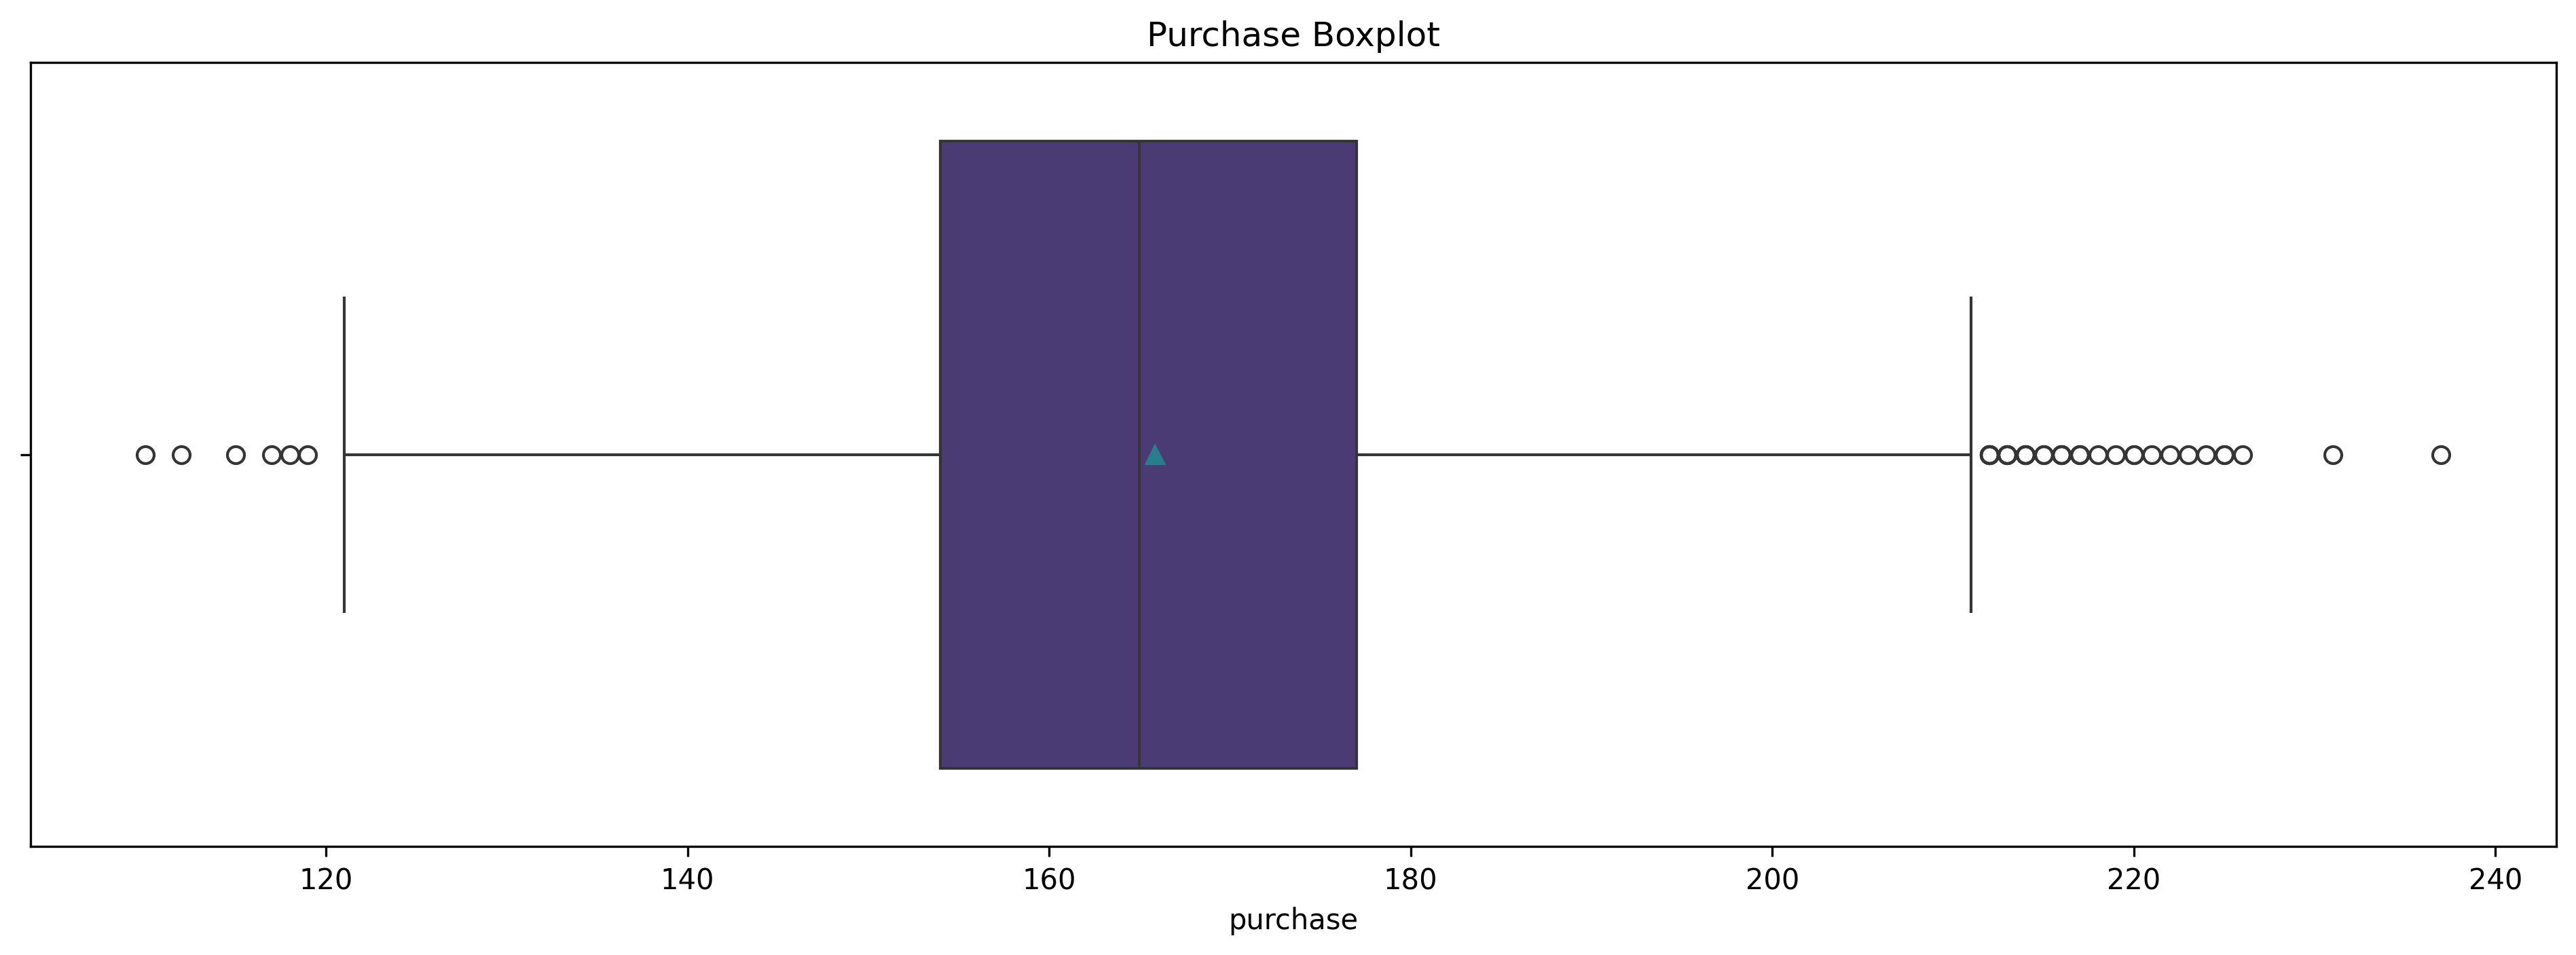

In [9]:
figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.title('Purchase Boxplot')
plt.show()

In [10]:
print(round(dataset['purchase'].describe(),3))

count    3935.000
mean      165.861
std        17.161
min       110.000
25%       154.000
50%       165.000
75%       177.000
max       237.000
Name: purchase, dtype: float64


We can see that there are some dots before minimum line and after maximum line which indicate outliers. We can try to shave it if makes the distribution better.

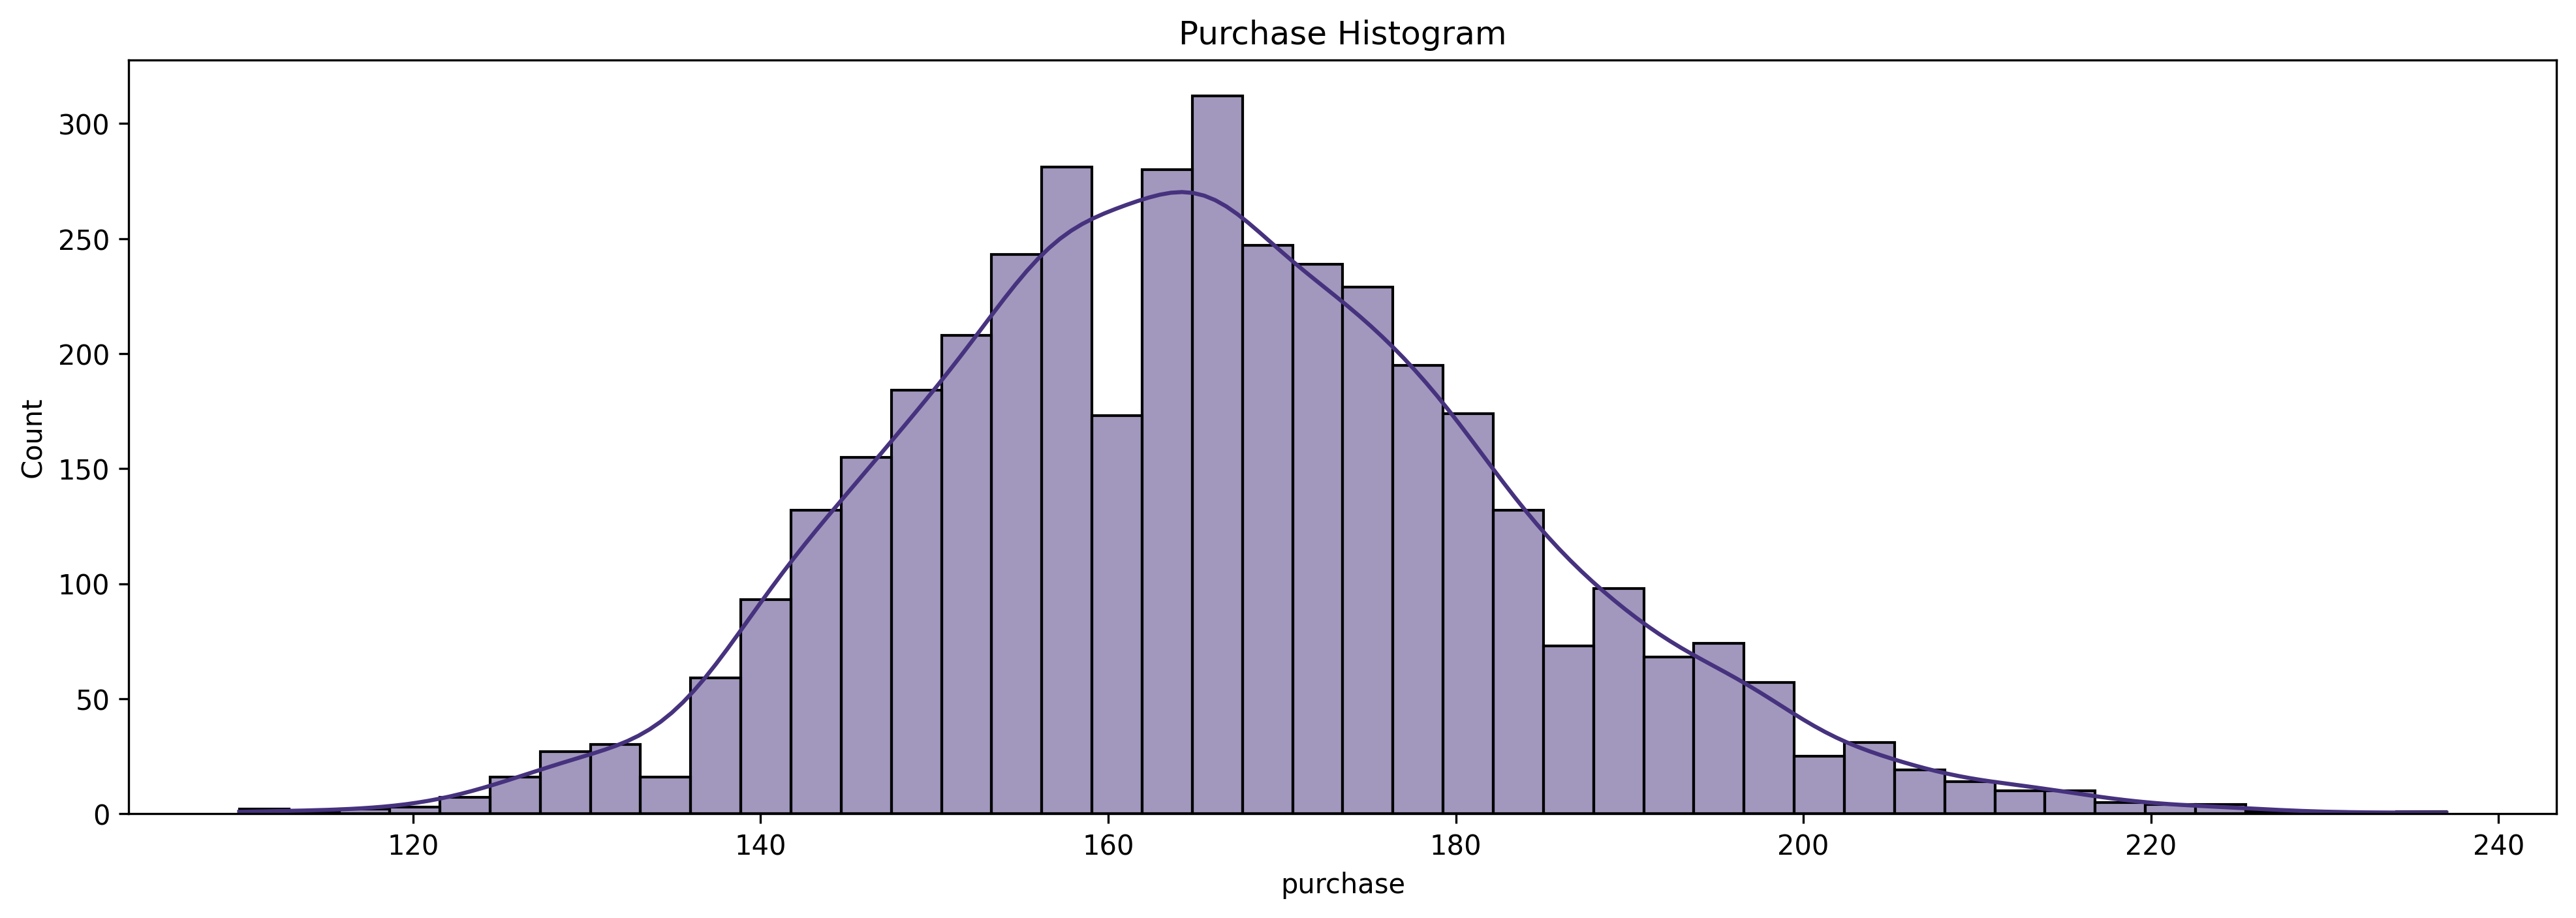

In [11]:
figure()
sns.histplot(dataset['purchase'],kde=True)
plt.title('Purchase Histogram')
plt.show()

In [12]:
count_purchase = dataset.groupby('customer_id')['customer_id'].count()

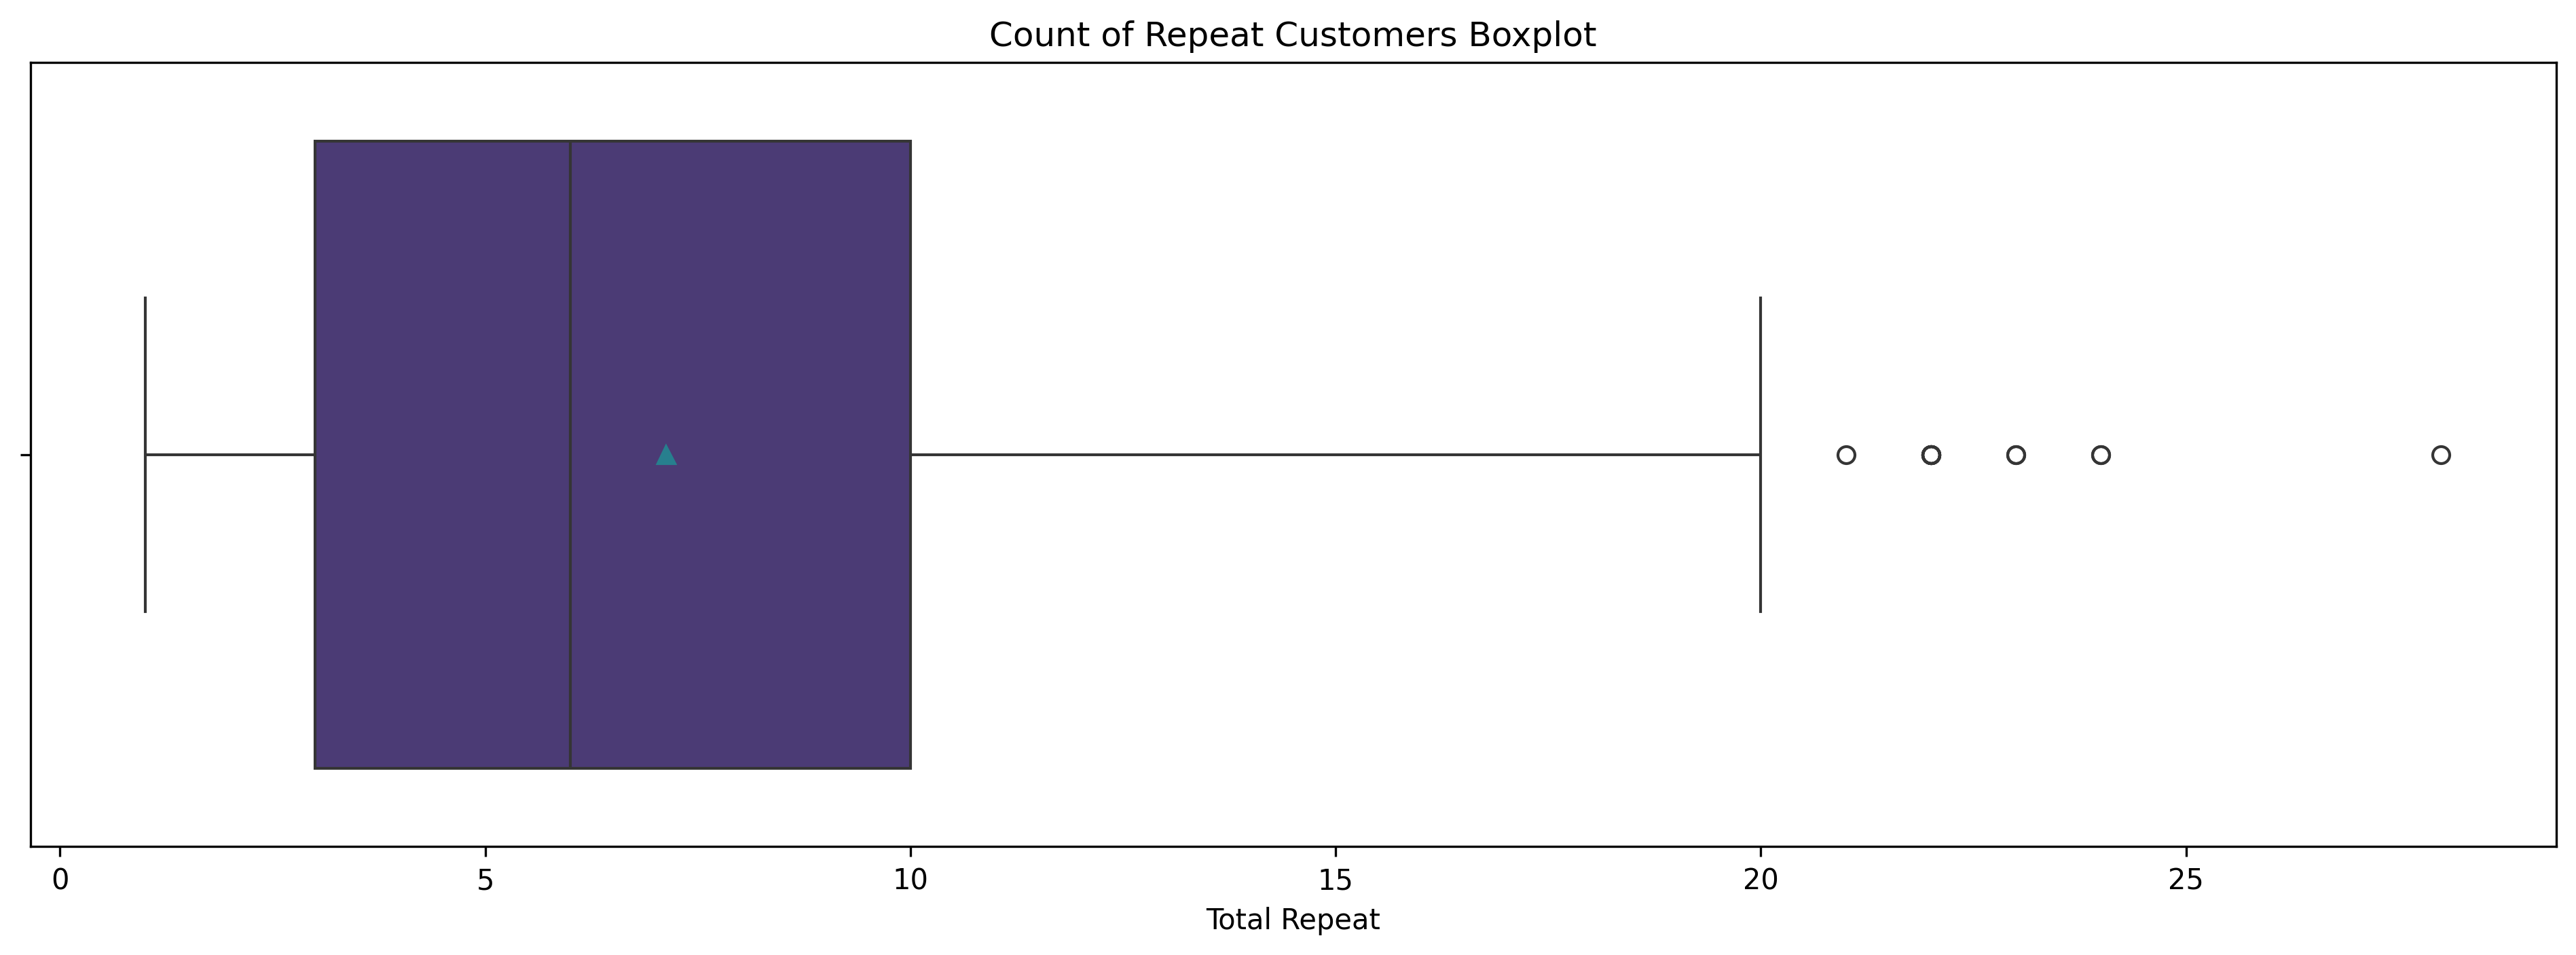

In [13]:
figure()
sns.boxplot(x=count_purchase, showmeans=True)
plt.title('Count of Repeat Customers Boxplot')
plt.xlabel('Total Repeat')
plt.show()

In [14]:
print(round(count_purchase.describe(), 3))

count    552.000
mean       7.129
std        5.285
min        1.000
25%        3.000
50%        6.000
75%       10.000
max       28.000
Name: customer_id, dtype: float64


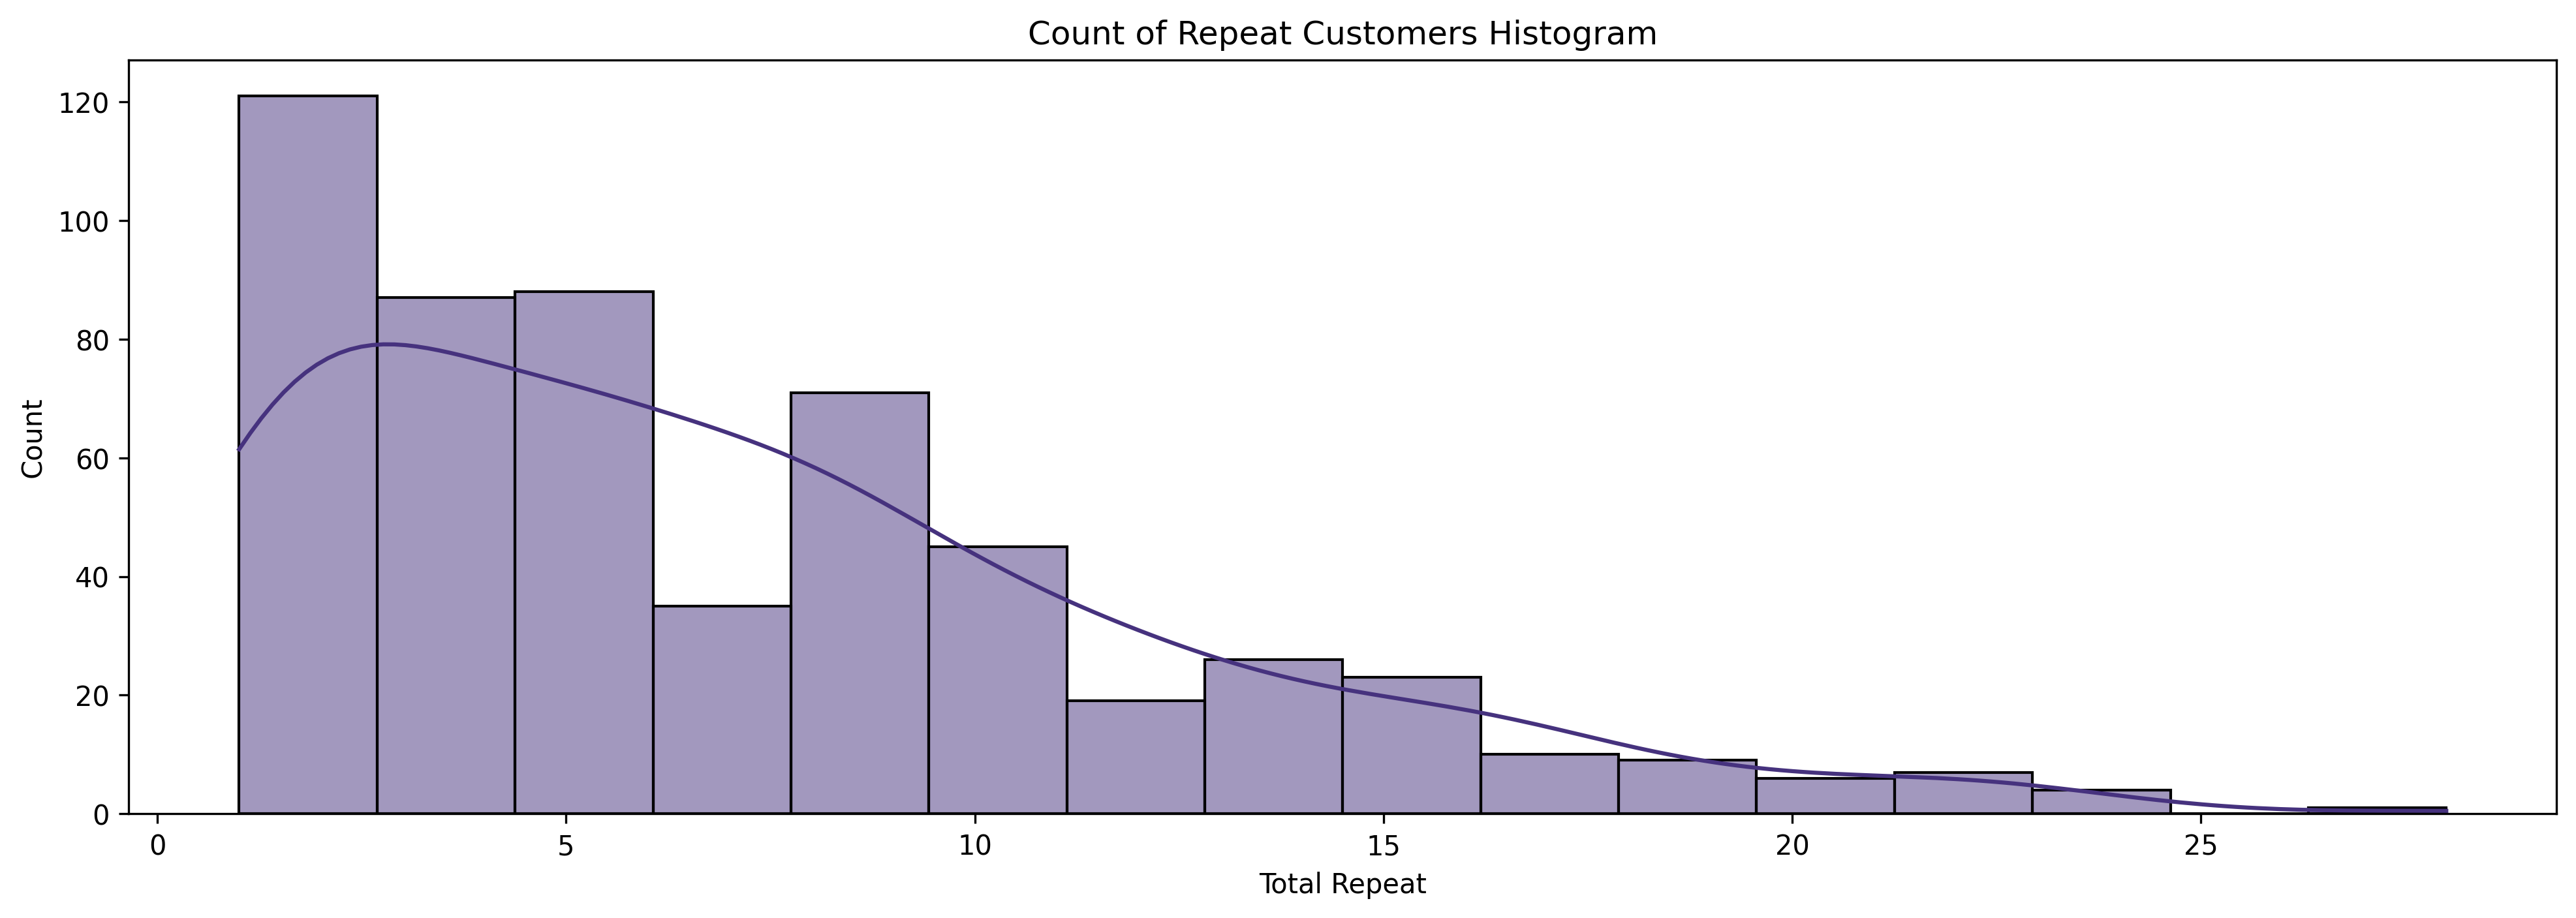

In [15]:
figure()
sns.histplot(count_purchase, kde=True)
plt.title('Count of Repeat Customers Histogram')
plt.xlabel('Total Repeat')
plt.show()

In [16]:
def normality_test(array):
    stat, p1 = stats.shapiro(array)
    stat, p2 = stats.normaltest(array)
    if p1 >= 0.05:
        print('fail to reject H0 using shapiro test.')
        print(f"the variable is normally distributed with p-value: {p1}.")
    elif p1 < 0.05:
        print('accept to reject H0 using shapiro test.')
        print(f"the variable is not normally distributed with p-value {p1}.")
    print("")
    if p2 >= 0.05:
        print('fail to reject H0 using pearsons test.')
        print(f"the variable is normally distributed with p-value: {p2}.")
    elif p2 < 0.05:
        print('accept to reject H0 using pearsons test.')
        print(f"the variable is not normally distributed with p-value {p2}.")

In [17]:
normality_test(dataset['purchase'])

accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 4.3685643036298396e-11.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 1.945095371214822e-14.


After normality test, we know that purchase variable is not normally distributed and we cannot use parametric statistical test. We will use Mann Whitney U test where this alternative test is for non parametric dataset without assumpt gaussian distribution.

In [18]:
normality_test(count_purchase)

accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 1.1684435170813937e-17.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 2.940365058852117e-17.


customer repeat purchase(count_purchase) is also not gaussian distribution. So, we can use Mann Whitney U test for this variable.

### Categorical

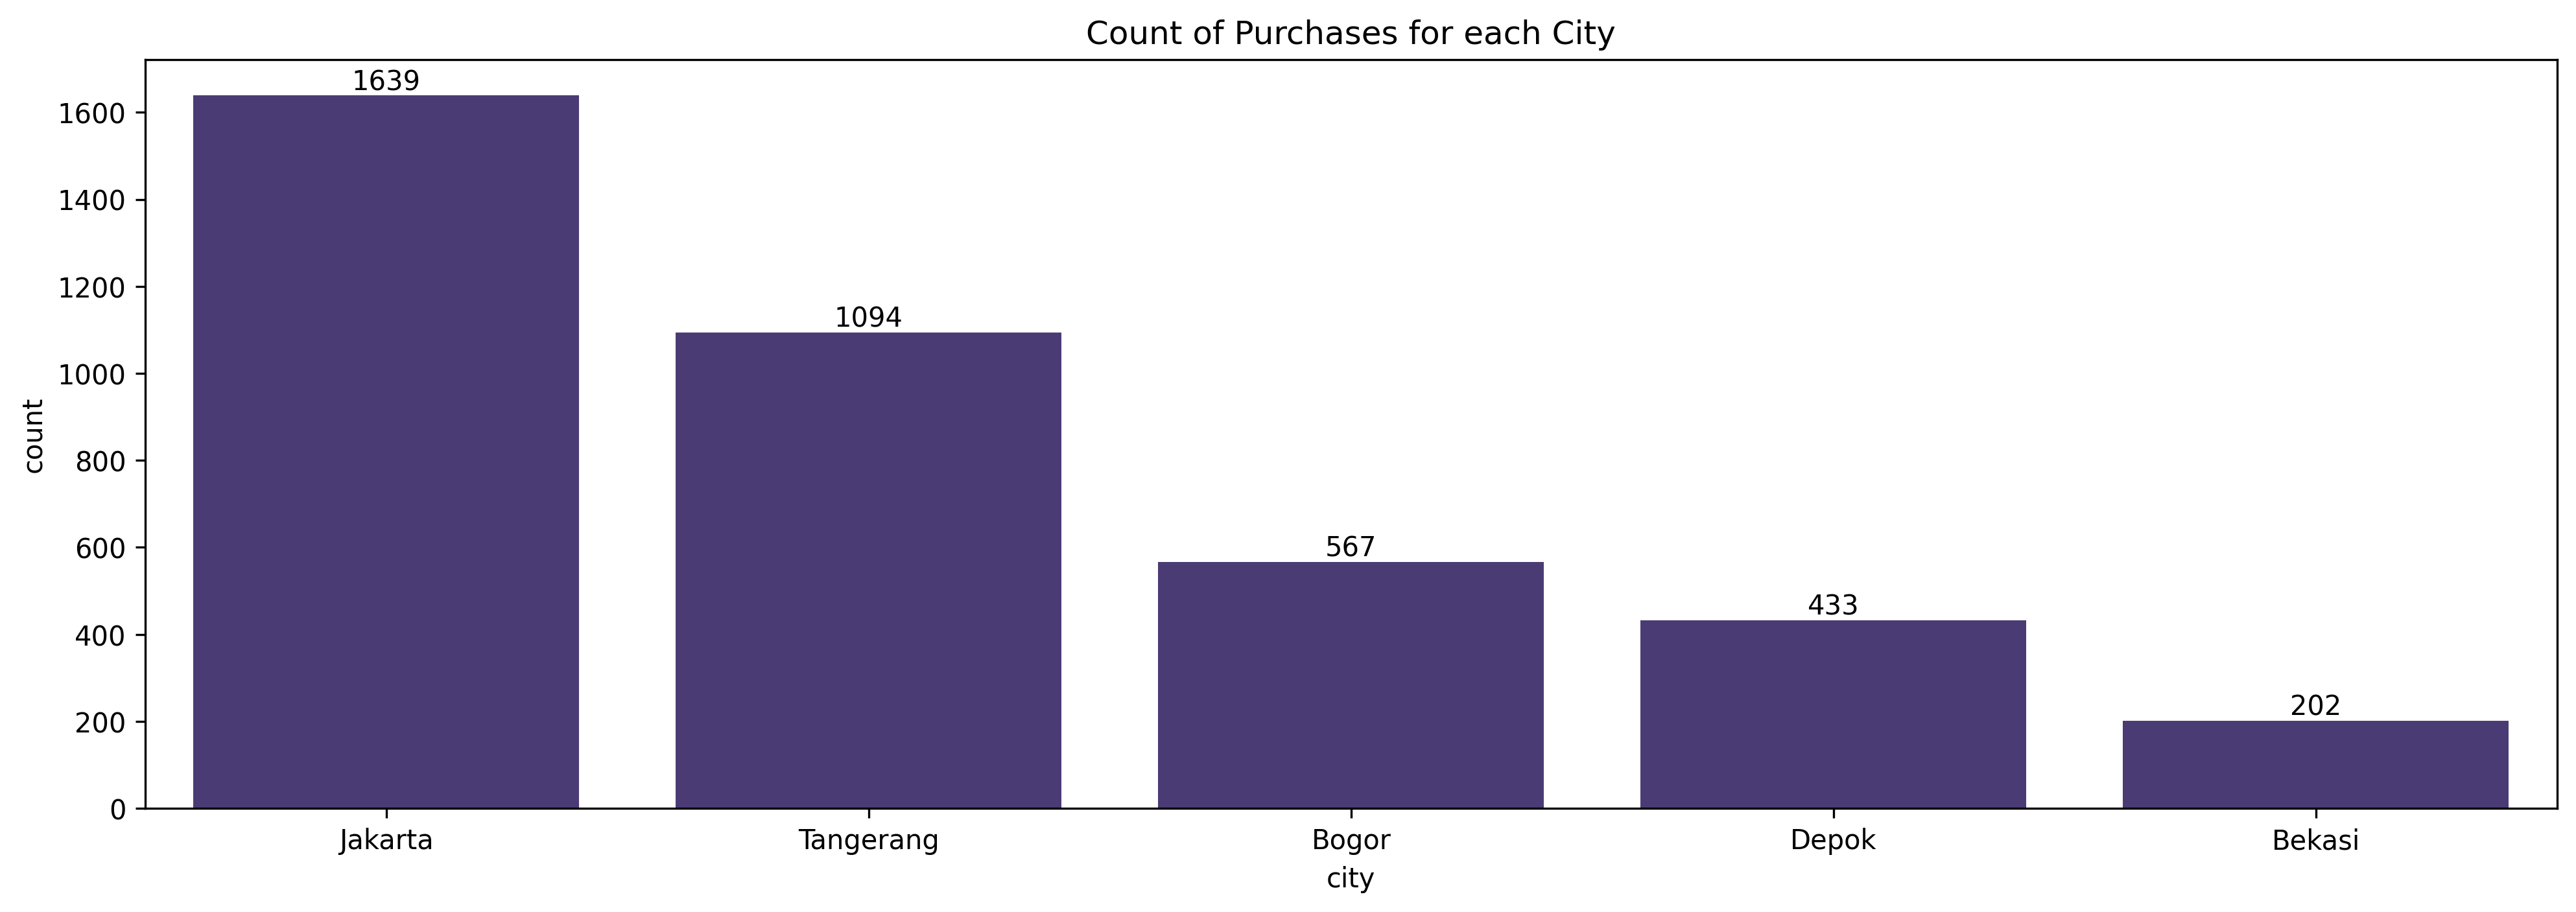

In [19]:
figure()
ax = sns.barplot(dataset['city'].value_counts(),)
ax.bar_label(ax.containers[0])
plt.title('Count of Purchases for each City')
plt.show()

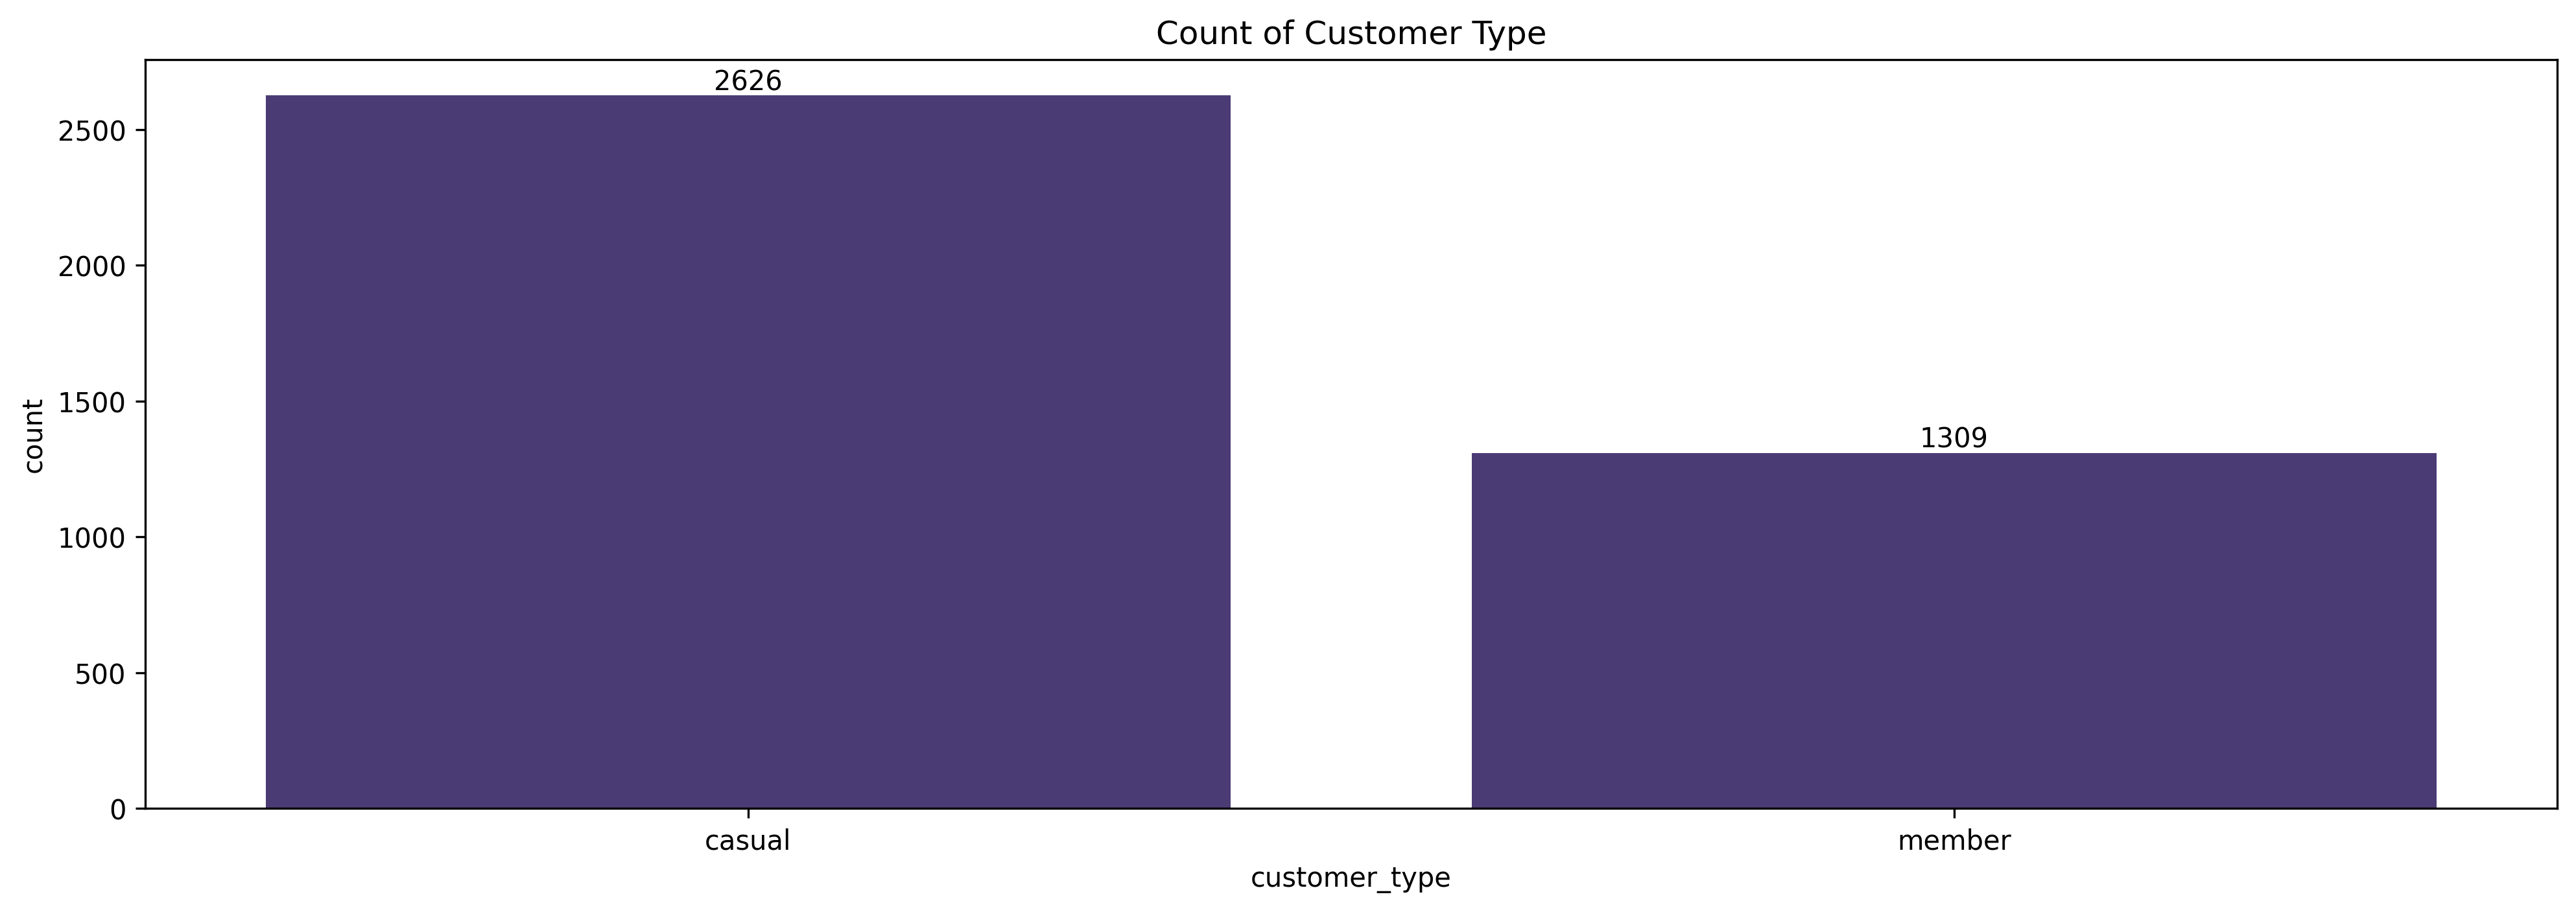

In [20]:
figure()
ax = sns.barplot(dataset['customer_type'].value_counts())
ax.bar_label(ax.containers[0])
plt.title('Count of Customer Type')
plt.show()

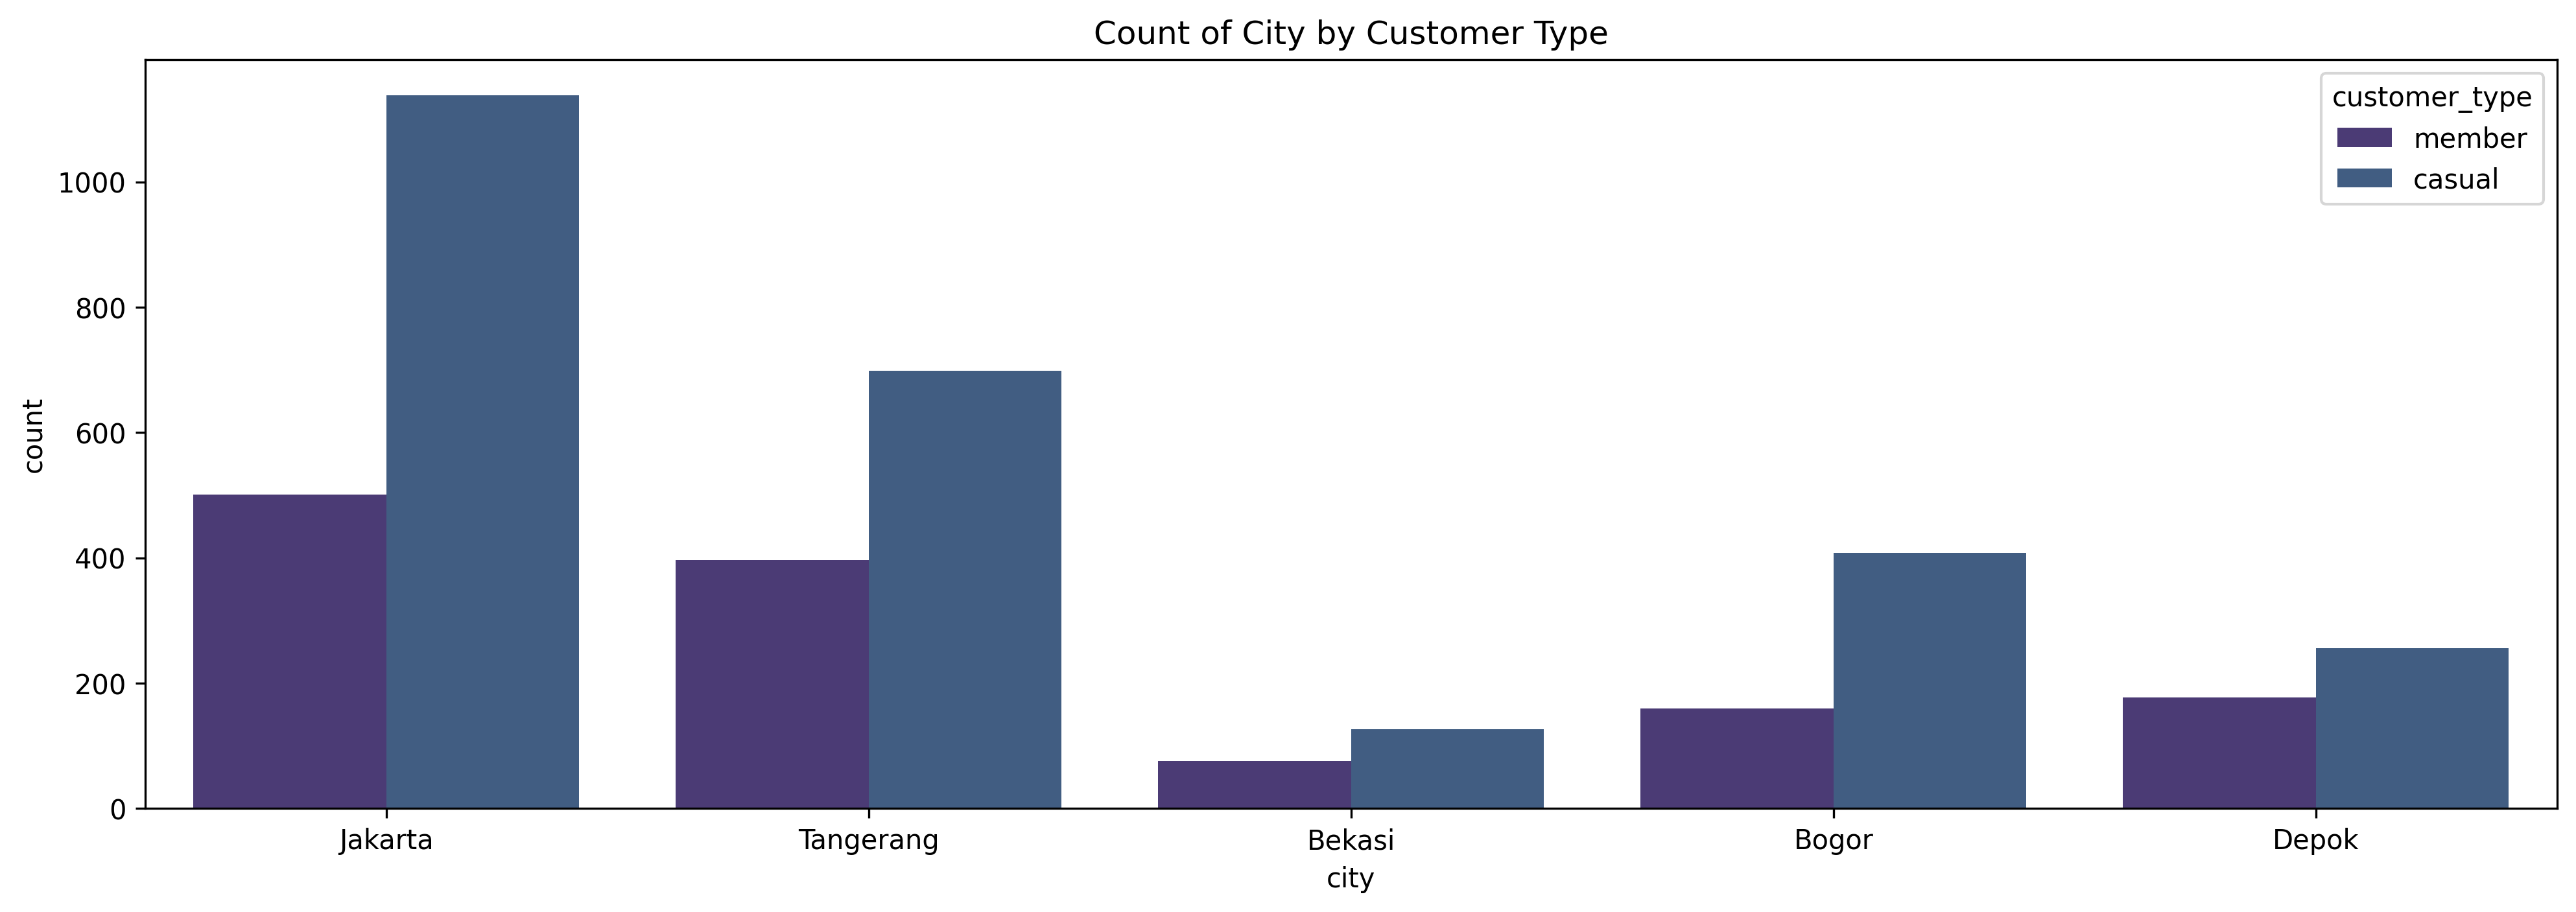

In [21]:
figure()
sns.countplot(dataset, x='city', hue='customer_type')
plt.title('Count of City by Customer Type')
plt.show()

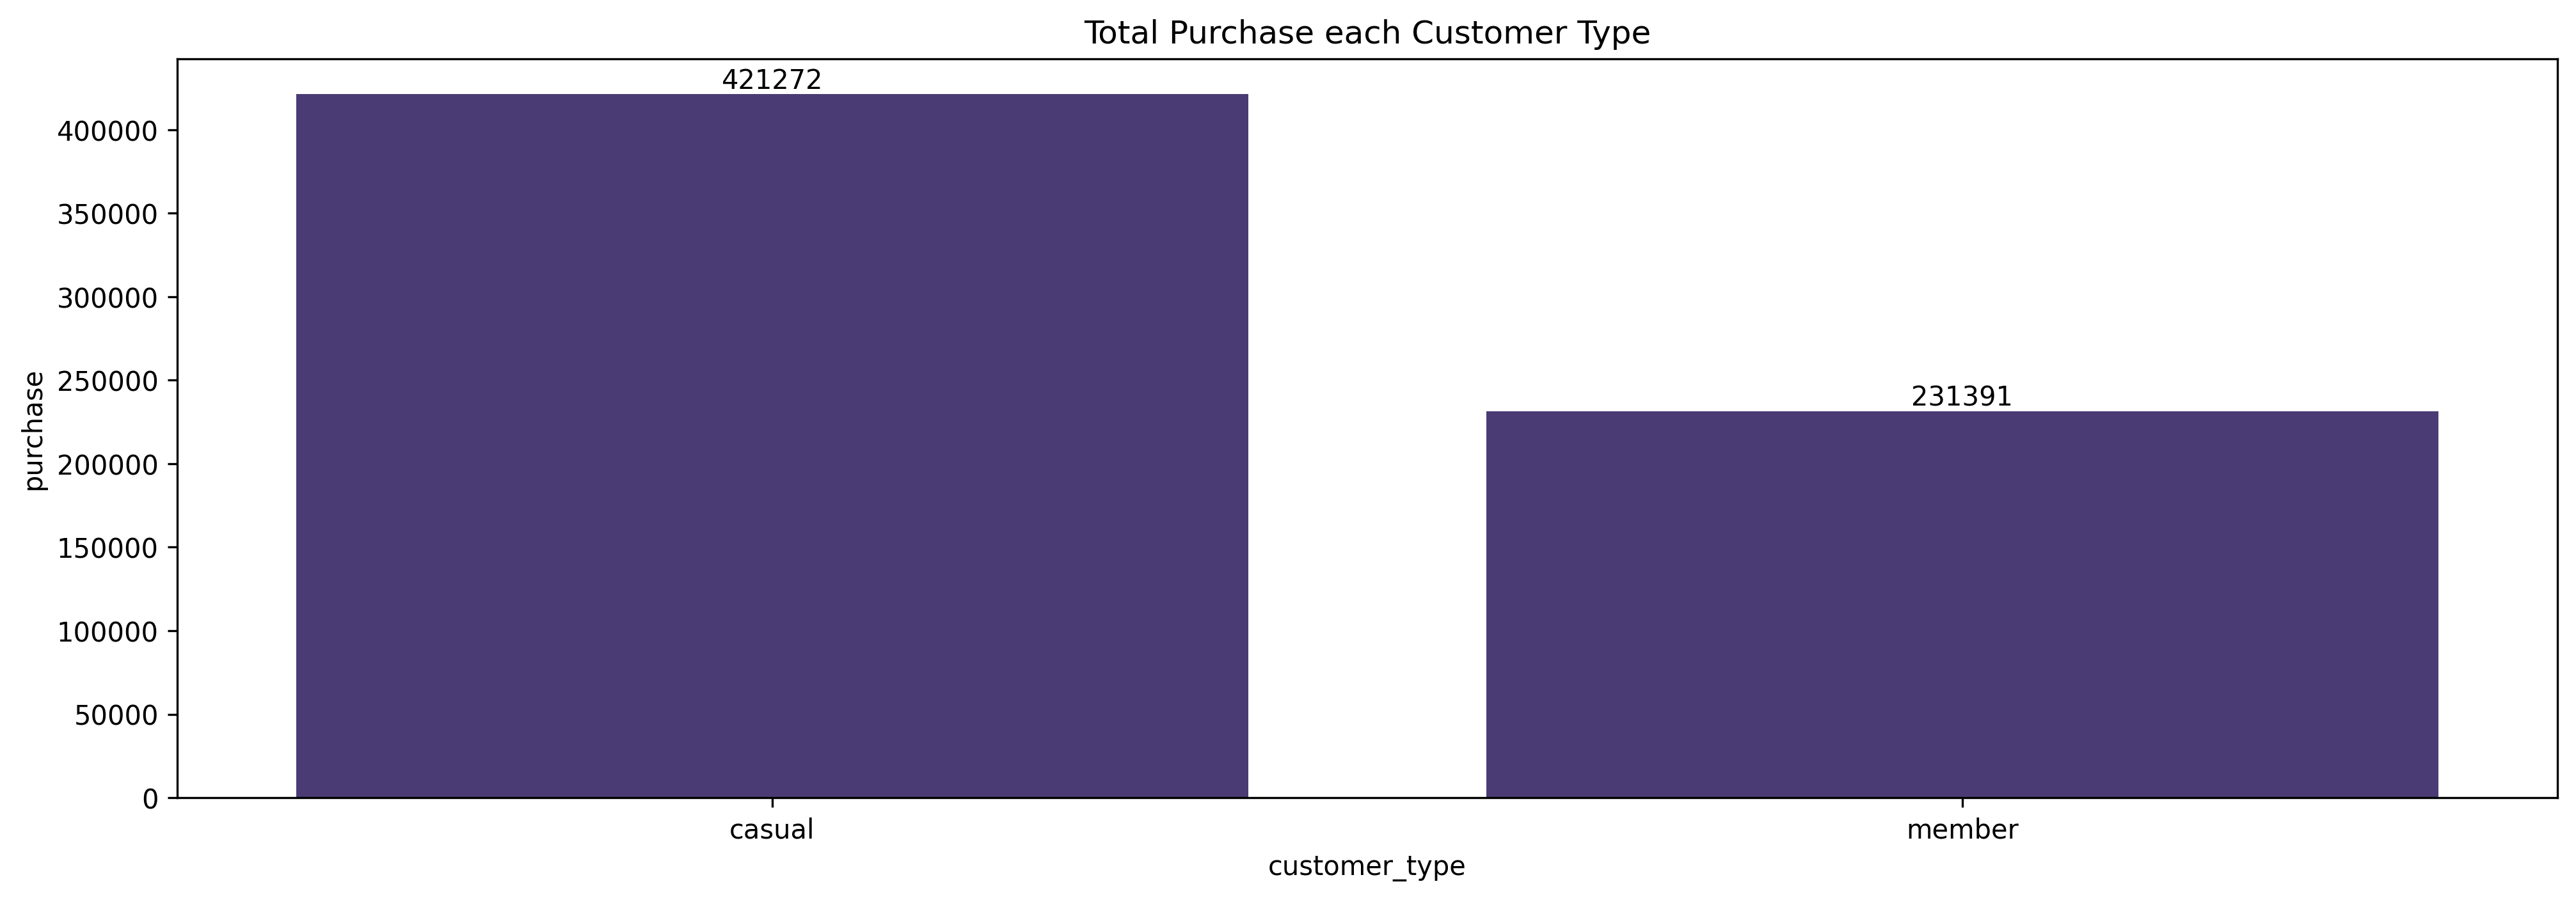

In [22]:
figure()
ax = sns.barplot(dataset.groupby('customer_type')['purchase'].sum())
ax.bar_label(ax.containers[0])
plt.title('Total Purchase each Customer Type')
plt.show()

In [23]:
round(dataset.groupby('customer_type')['purchase'].sum()/dataset['purchase'].sum(), 3)

customer_type
casual    0.645
member    0.355
Name: purchase, dtype: float64

In [24]:
round(dataset['customer_type'].value_counts()/dataset['customer_type'].count(), 3)

customer_type
casual    0.667
member    0.333
Name: count, dtype: float64

# Data Preprocessing

## Handling Outliers

Lets see one more time the outliers based on boxplot visualization.

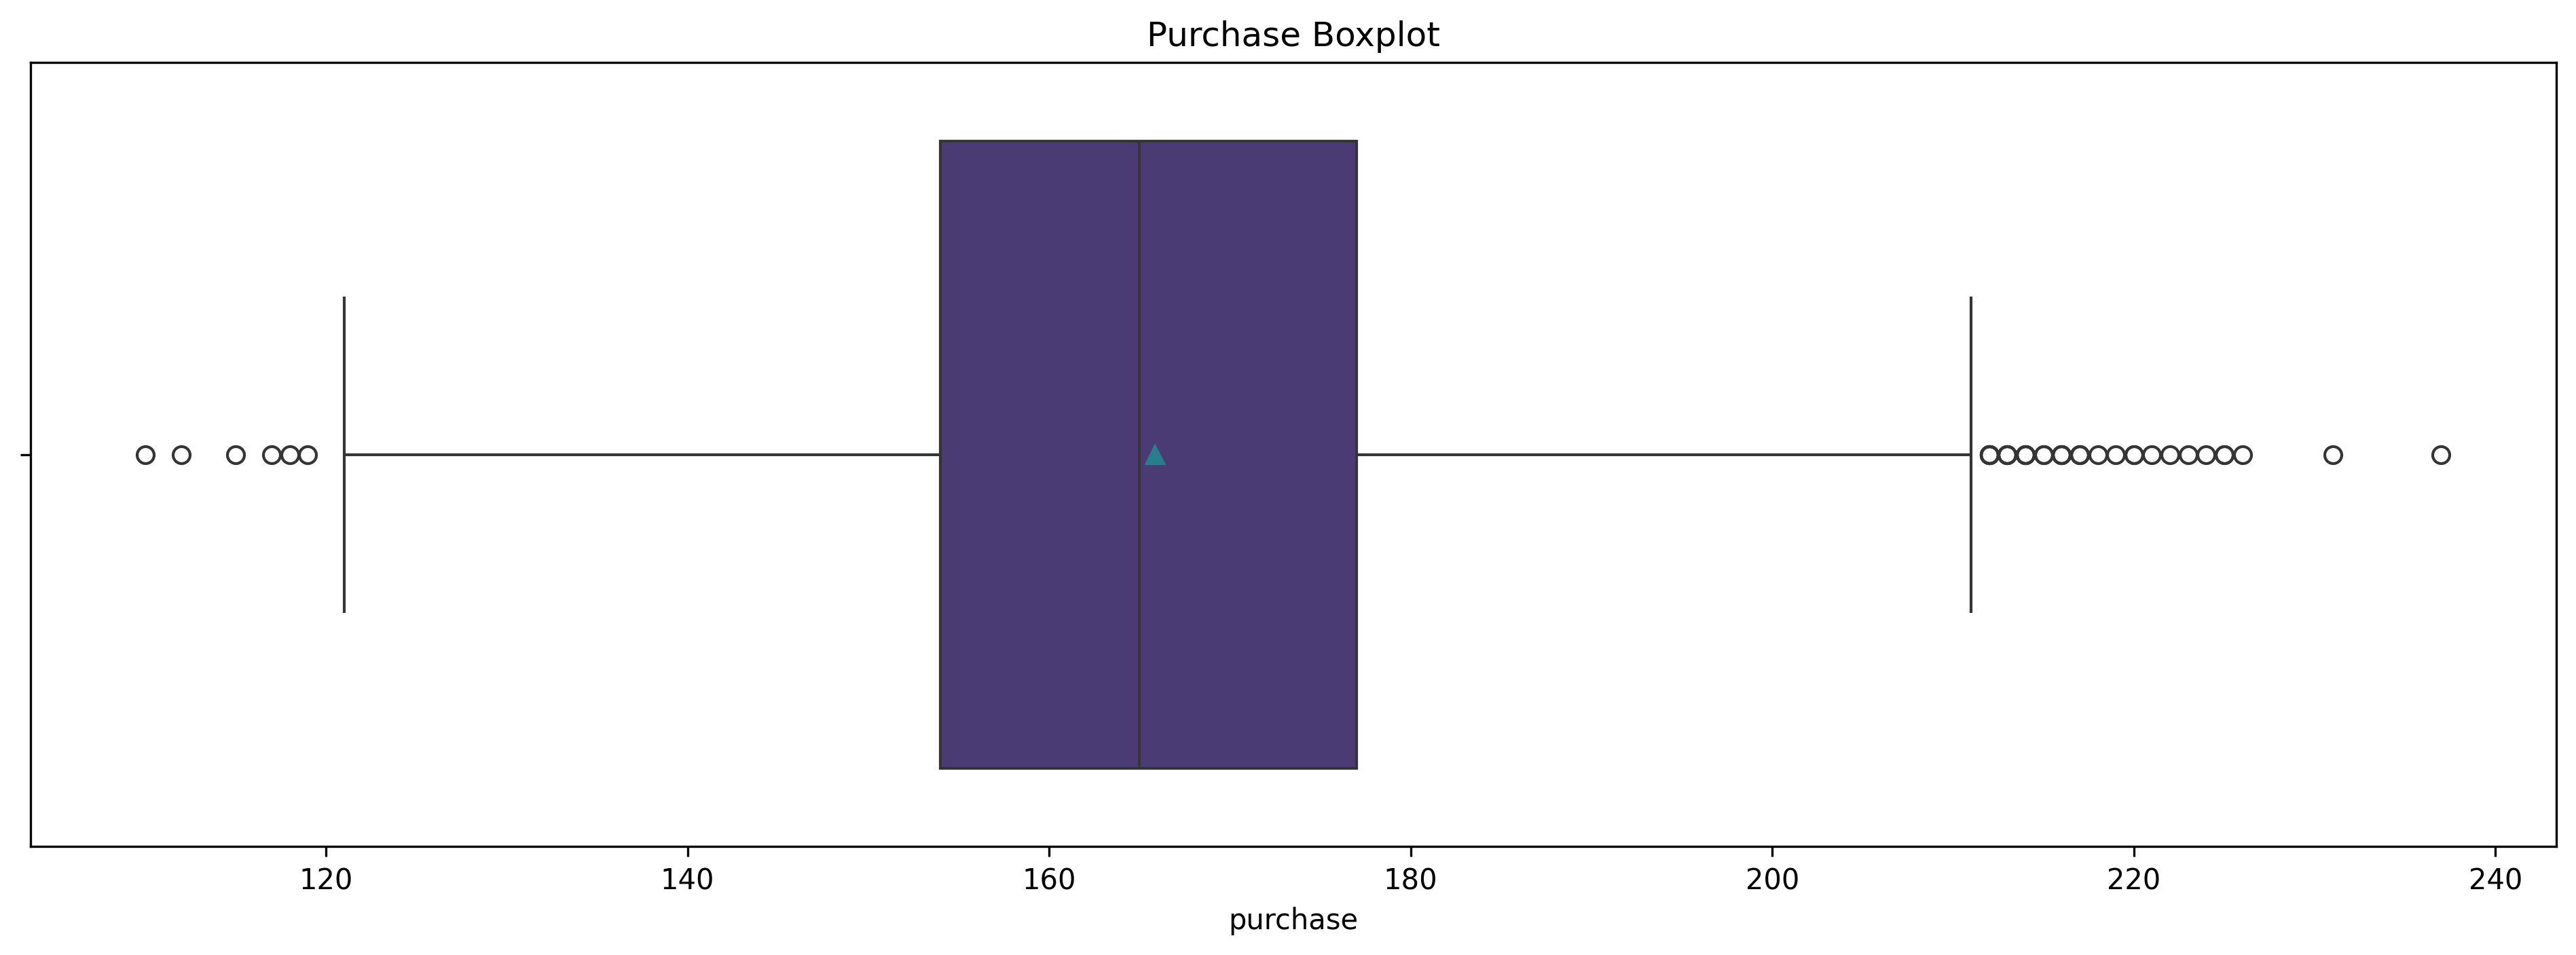

In [25]:
figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.title('Purchase Boxplot')
plt.show()

211.5
177.0
23.0
154.0
119.5


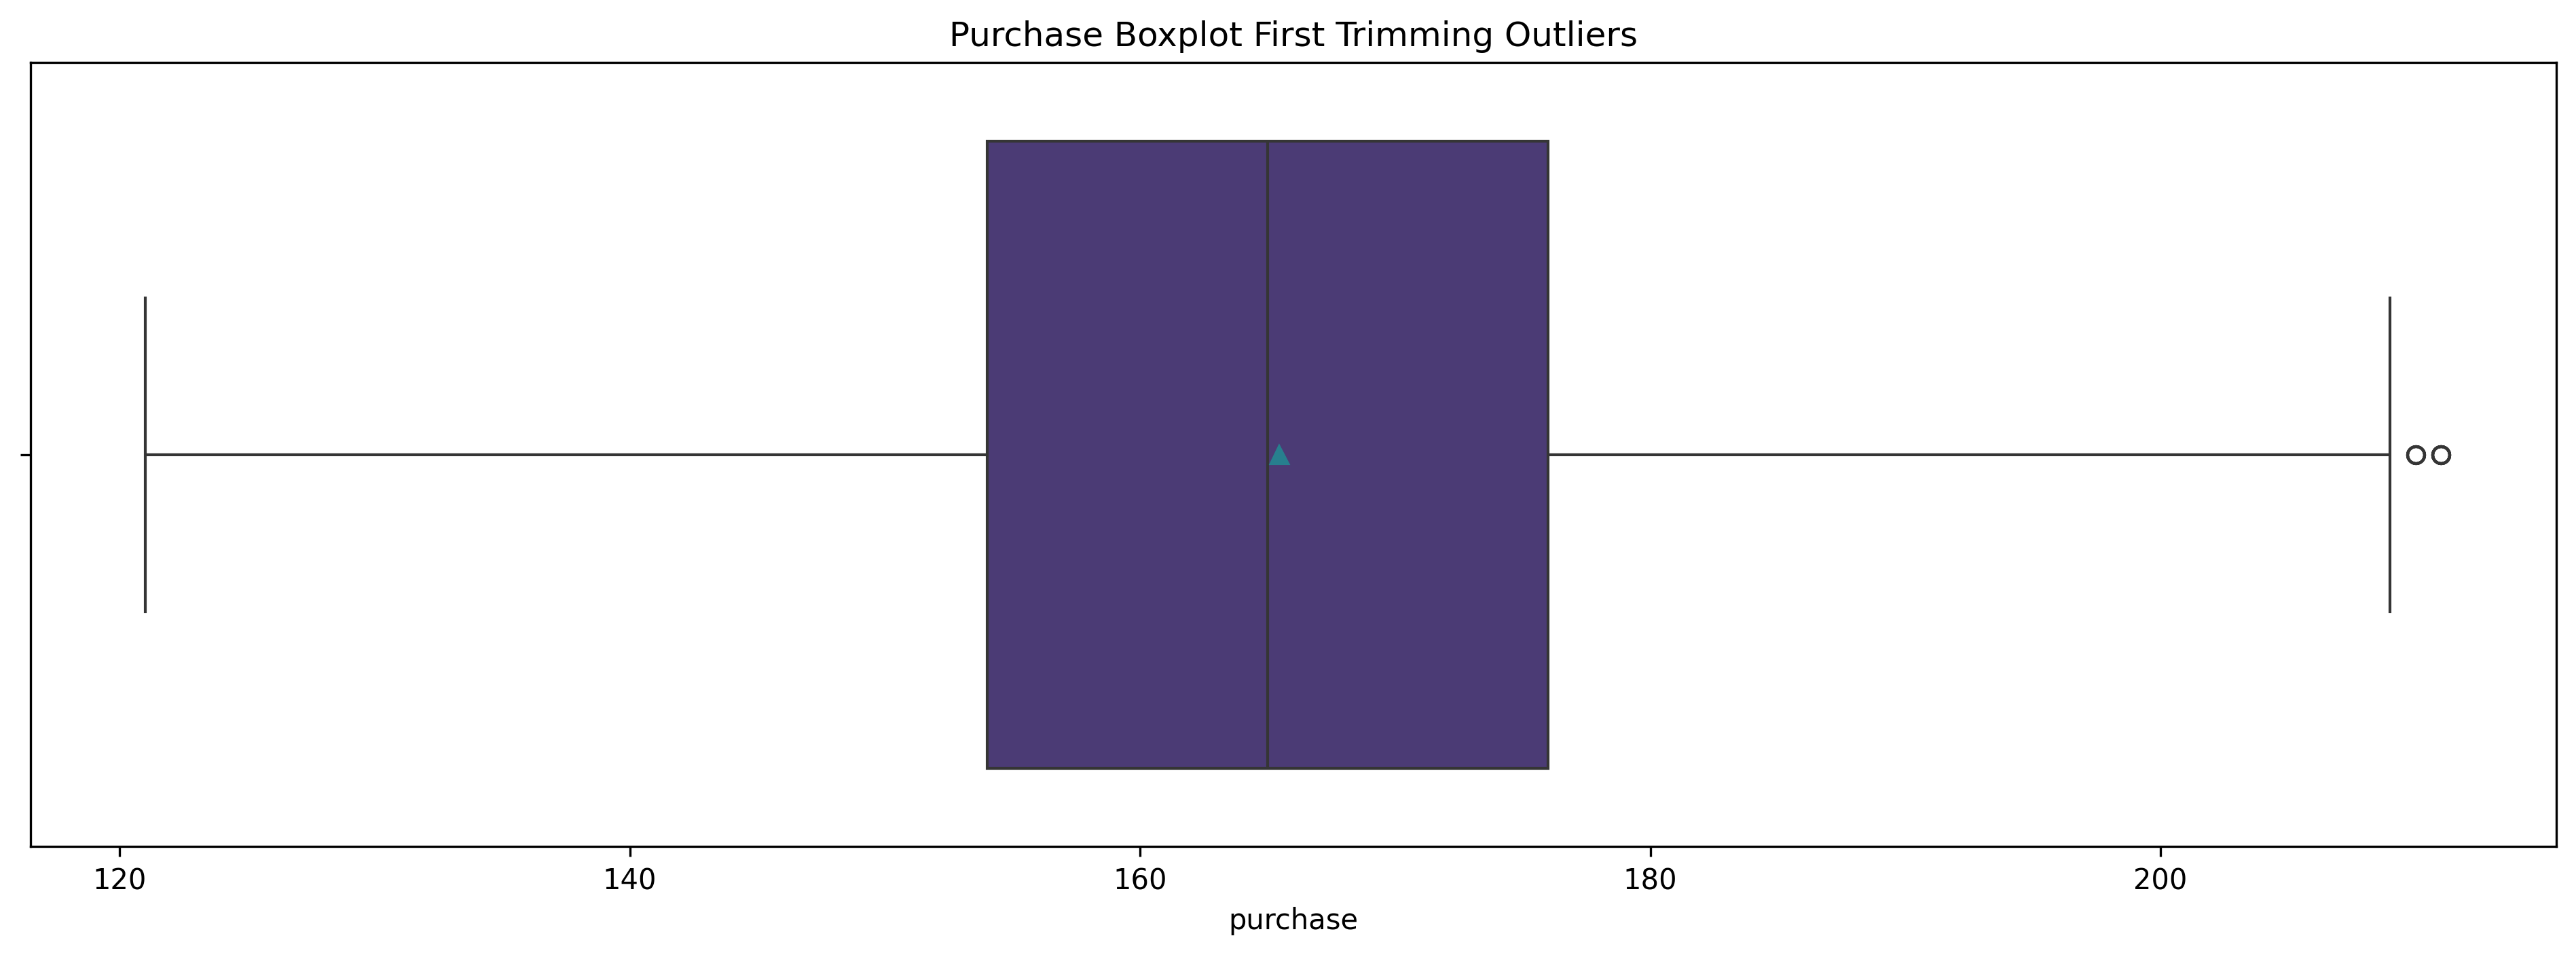

In [26]:
q3 = dataset['purchase'].quantile(0.75)
q1 = dataset['purchase'].quantile(0.25)
iqr = q3-q1
upper_line = q3 + (1.5*iqr)
lower_line = q1 - (1.5*iqr)

print(upper_line)
print(q3)
print(iqr)
print(q1)
print(lower_line)

dataset = dataset[(dataset['purchase'] <= upper_line) & ((dataset['purchase'] >= lower_line))]

figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.title('Purchase Boxplot First Trimming Outliers')
plt.show()

We can see that there are still outliers. We can shave it one more time. If it still exists, we can leave it like that.

209.0
176.0
22.0
154.0
121.0


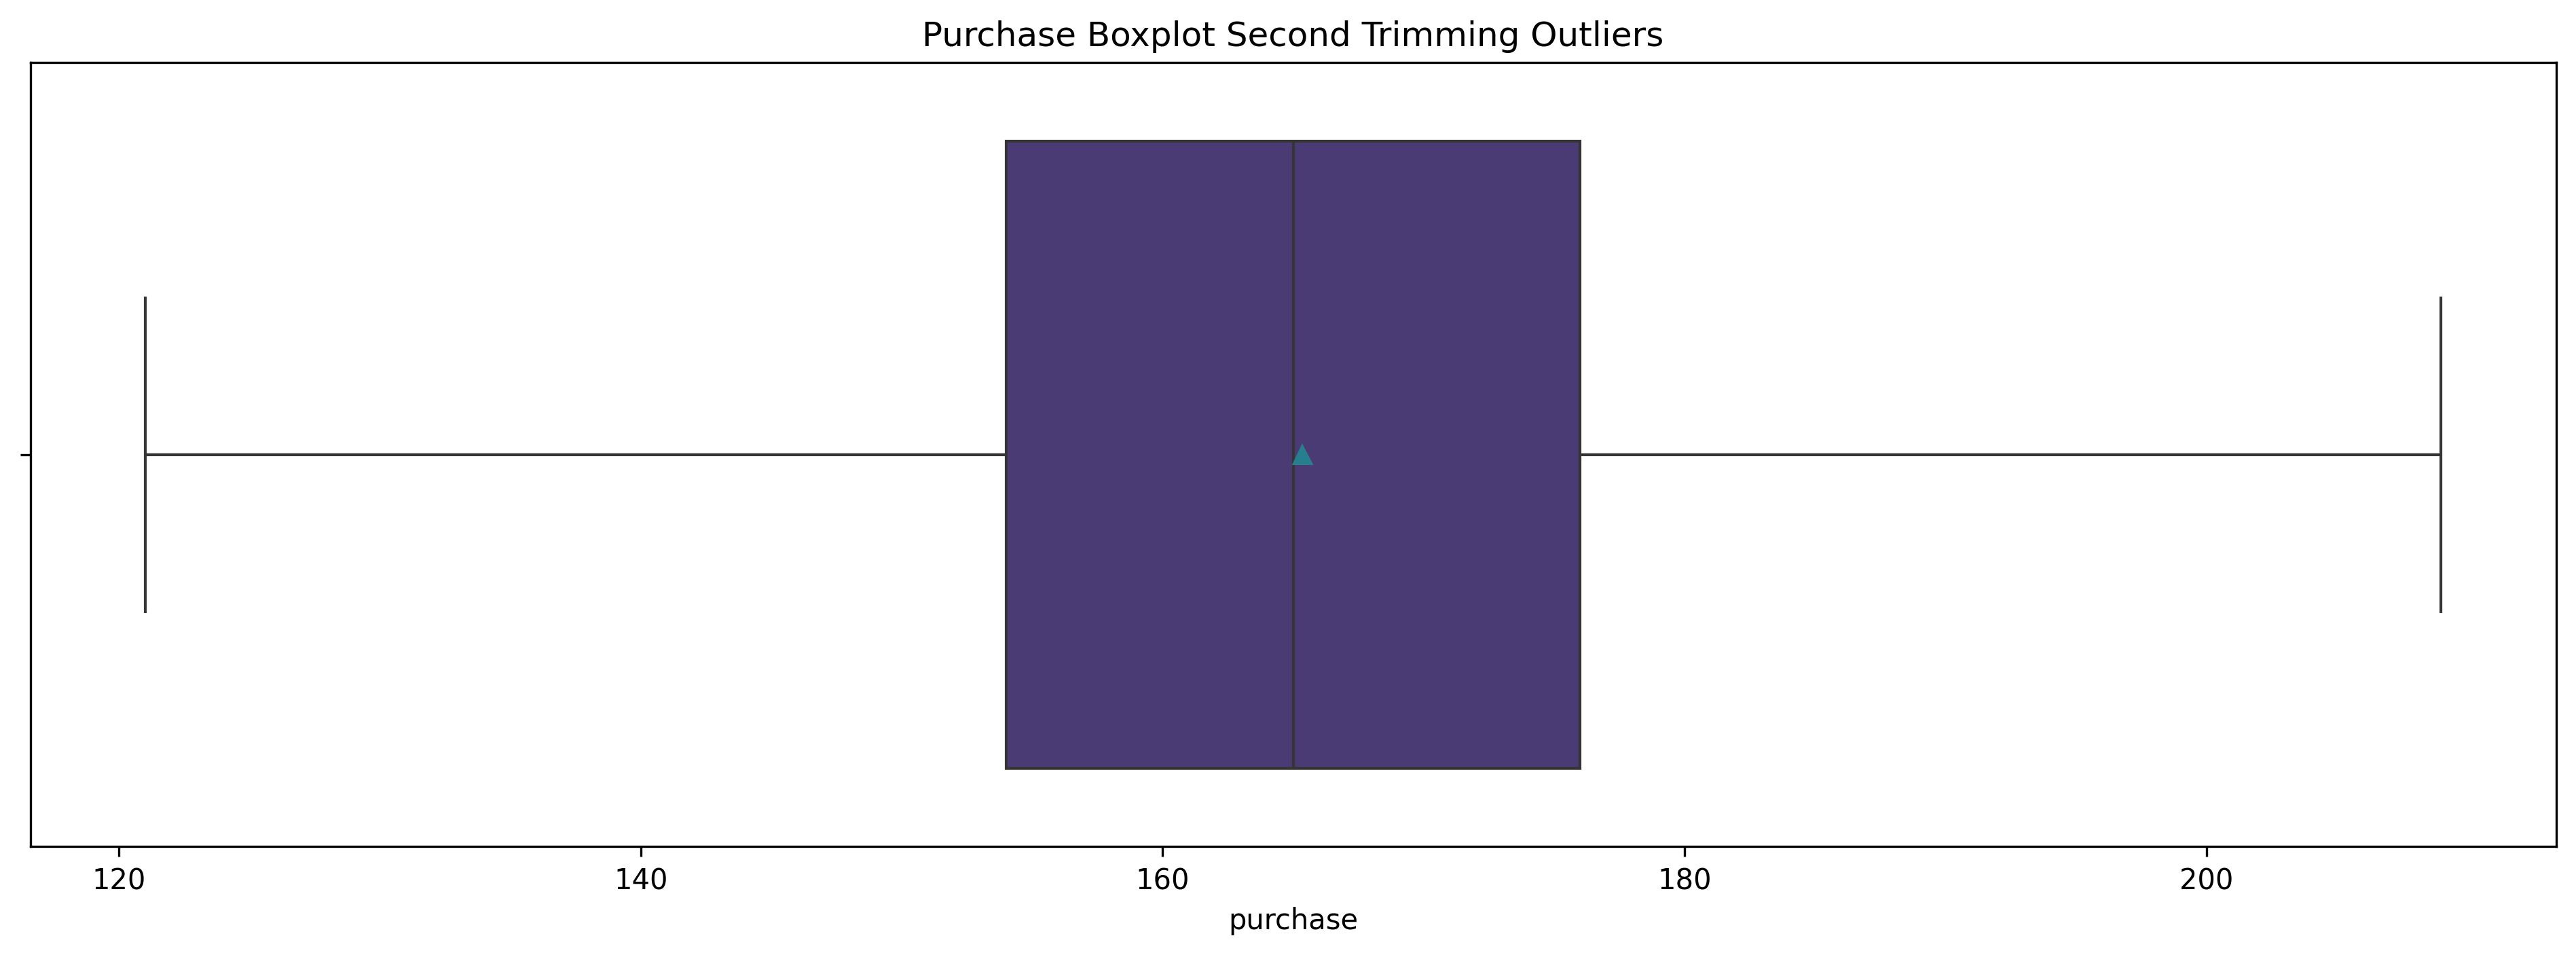

In [27]:
q3 = dataset['purchase'].quantile(0.75)
q1 = dataset['purchase'].quantile(0.25)
iqr = q3-q1
upper_line = q3 + (1.5*iqr)
lower_line = q1 - (1.5*iqr)

print(upper_line)
print(q3)
print(iqr)
print(q1)
print(lower_line)

dataset = dataset[(dataset['purchase'] <= upper_line) & ((dataset['purchase'] >= lower_line))]

figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.title('Purchase Boxplot Second Trimming Outliers')
plt.show()

## Repeat Purchase

In [28]:
repeat_purchase = dataset[['transaction_date','customer_id','customer_type']].pivot_table(values='transaction_date', index='customer_id', columns='customer_type', aggfunc='count')
print(repeat_purchase.head())

customer_type  casual  member
customer_id                  
1                20.0     NaN
2                 NaN     9.0
3                 6.0     NaN
4                 NaN     8.0
5                12.0     NaN


In [29]:
member_repeat_purchase = repeat_purchase['member'].dropna()
casual_repeat_purchase = repeat_purchase['casual'].dropna()

## Money Spent

In [30]:
purchase_sum = pd.DataFrame(dataset.groupby(['customer_id', 'customer_type'])['purchase'].sum()).reset_index()

# purchase or money spent
member_purchase_sum = purchase_sum[purchase_sum['customer_type'] == 'member']['purchase']
casual_purchase_sum = purchase_sum[purchase_sum['customer_type'] == 'casual']['purchase']

In [31]:
purchase_mean = pd.DataFrame(dataset.groupby(['customer_id', 'customer_type'])['purchase'].mean()).reset_index()

# purchase or money spent
member_purchase_mean = purchase_mean[purchase_mean['customer_type'] == 'member']['purchase']
casual_purchase_mean = purchase_mean[purchase_mean['customer_type'] == 'casual']['purchase']

## City by Customer Type

In [32]:
# contingency table for
crosstab = dataset.pivot_table(index='city', columns='customer_type', values='customer_id', aggfunc='nunique')
print(crosstab)

customer_type  casual  member
city                         
Bekasi             20       7
Bogor              59      24
Depok              37      26
Jakarta           146      73
Tangerang         103      56


# Modeling

If the variable is normally distributed, we need to check whether or not the two groups have equal variance. Since the groups are not normally distributed, we can skip levine test.

In [33]:
def h0(p):
    if p < 0.05:
        return 'accept to reject'
    else:
        return 'fail to reject'

## Customer Repeat Purchase

In [34]:
stat_repeat_purchase, p_repeat_purchase = stats.mannwhitneyu(member_repeat_purchase, casual_repeat_purchase)

In [35]:
h0(p_repeat_purchase)

'fail to reject'

In [36]:
customer_repeat_purchase = ['member_repeat_purchase',
                            'casual_repeat_purchase',
                            'numeric',
                            stat_repeat_purchase.round(3),
                            p_repeat_purchase.round(3),
                            h0(p_repeat_purchase)]

In [37]:
print(f"With p-value {p_repeat_purchase:.3f} > 0.05, we fail to reject HO.")

With p-value 0.290 > 0.05, we fail to reject HO.


In [38]:
member_repeat_purchase_table = pd.DataFrame({'customer_type': 'member',
                                             'count': member_repeat_purchase})
casual_repeat_purchase_table = pd.DataFrame({'customer_type': 'casual',
                                             'count': casual_repeat_purchase})
repeat_purchase_table = pd.concat([member_repeat_purchase_table, casual_repeat_purchase_table], axis=0)

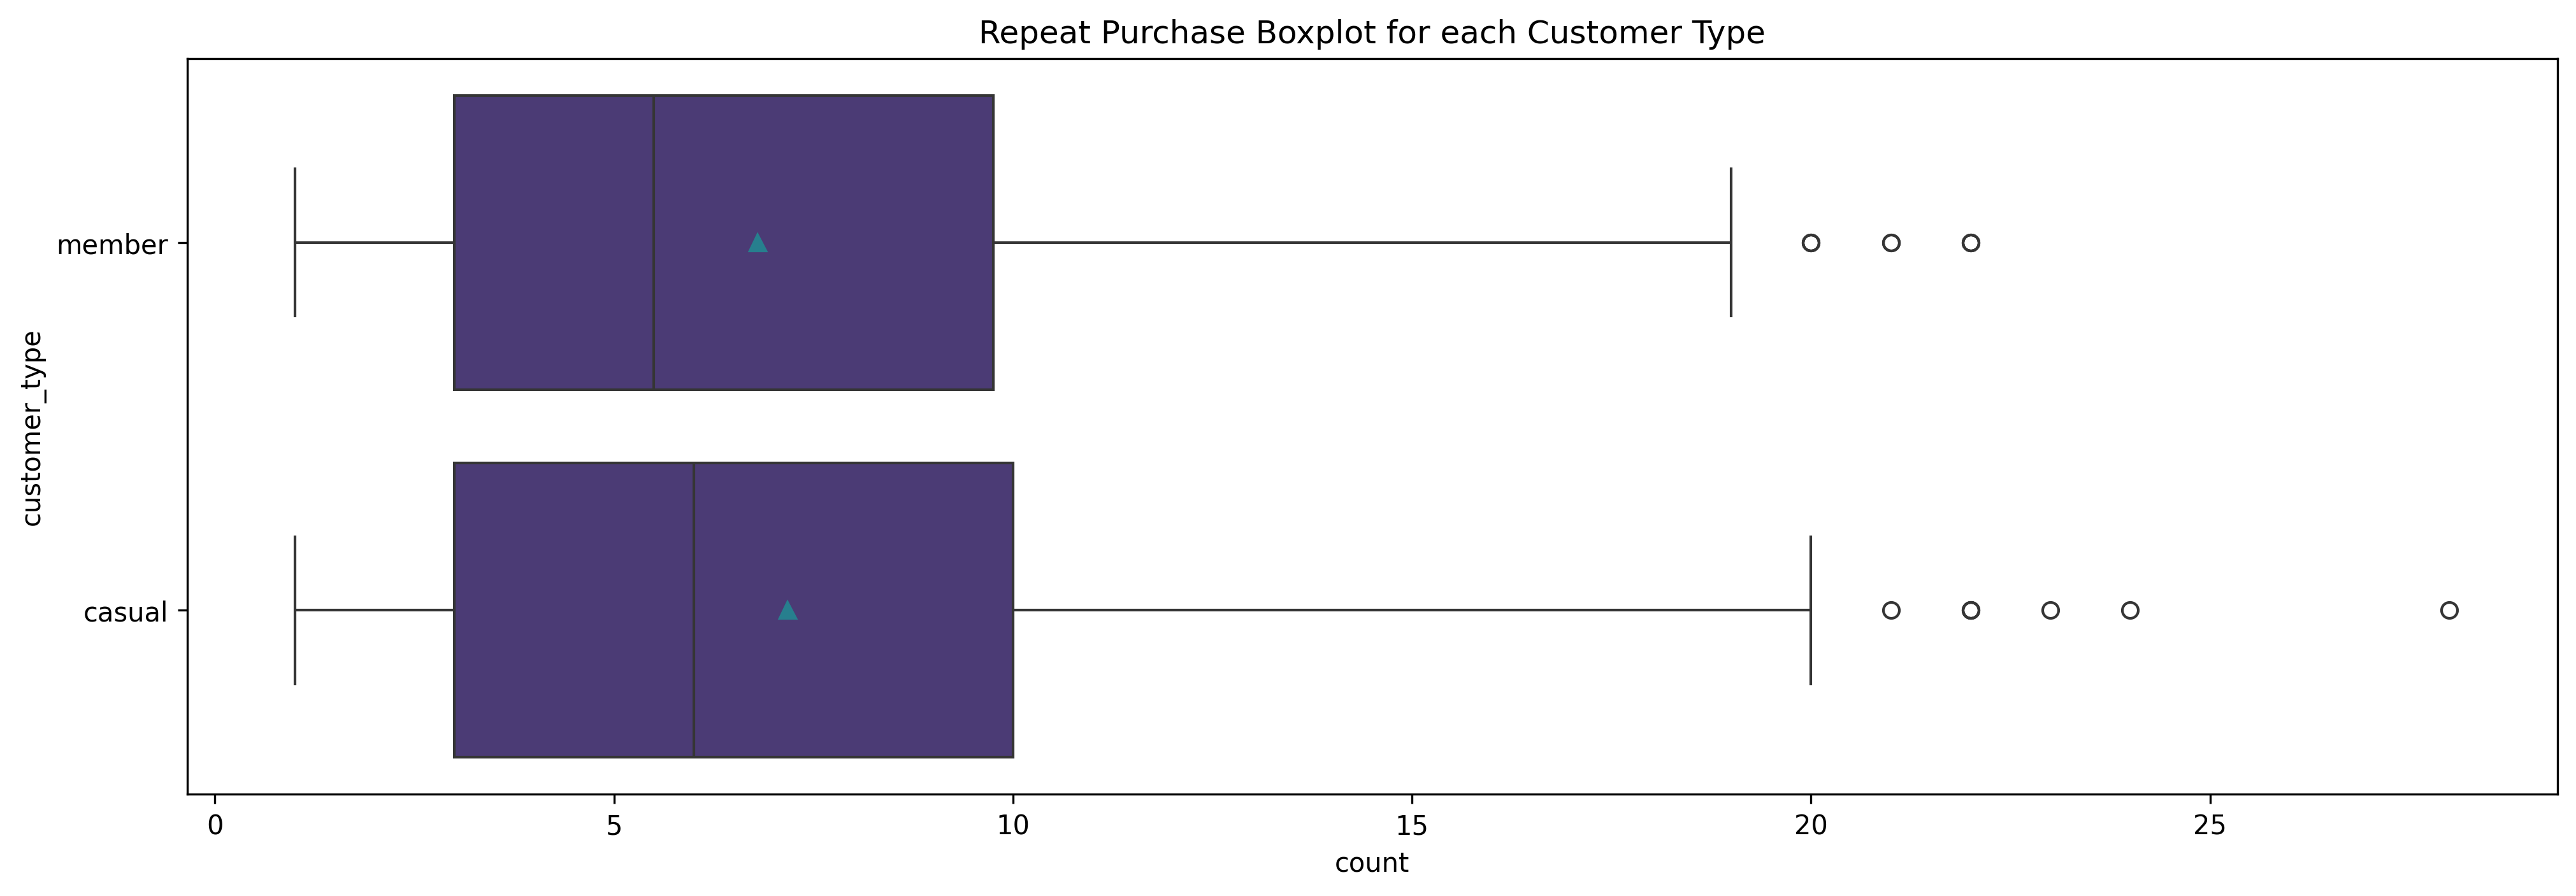

In [39]:
figure()
sns.boxplot(repeat_purchase_table, x='count', y='customer_type', showmeans=True)
plt.title('Repeat Purchase Boxplot for each Customer Type')
plt.show()

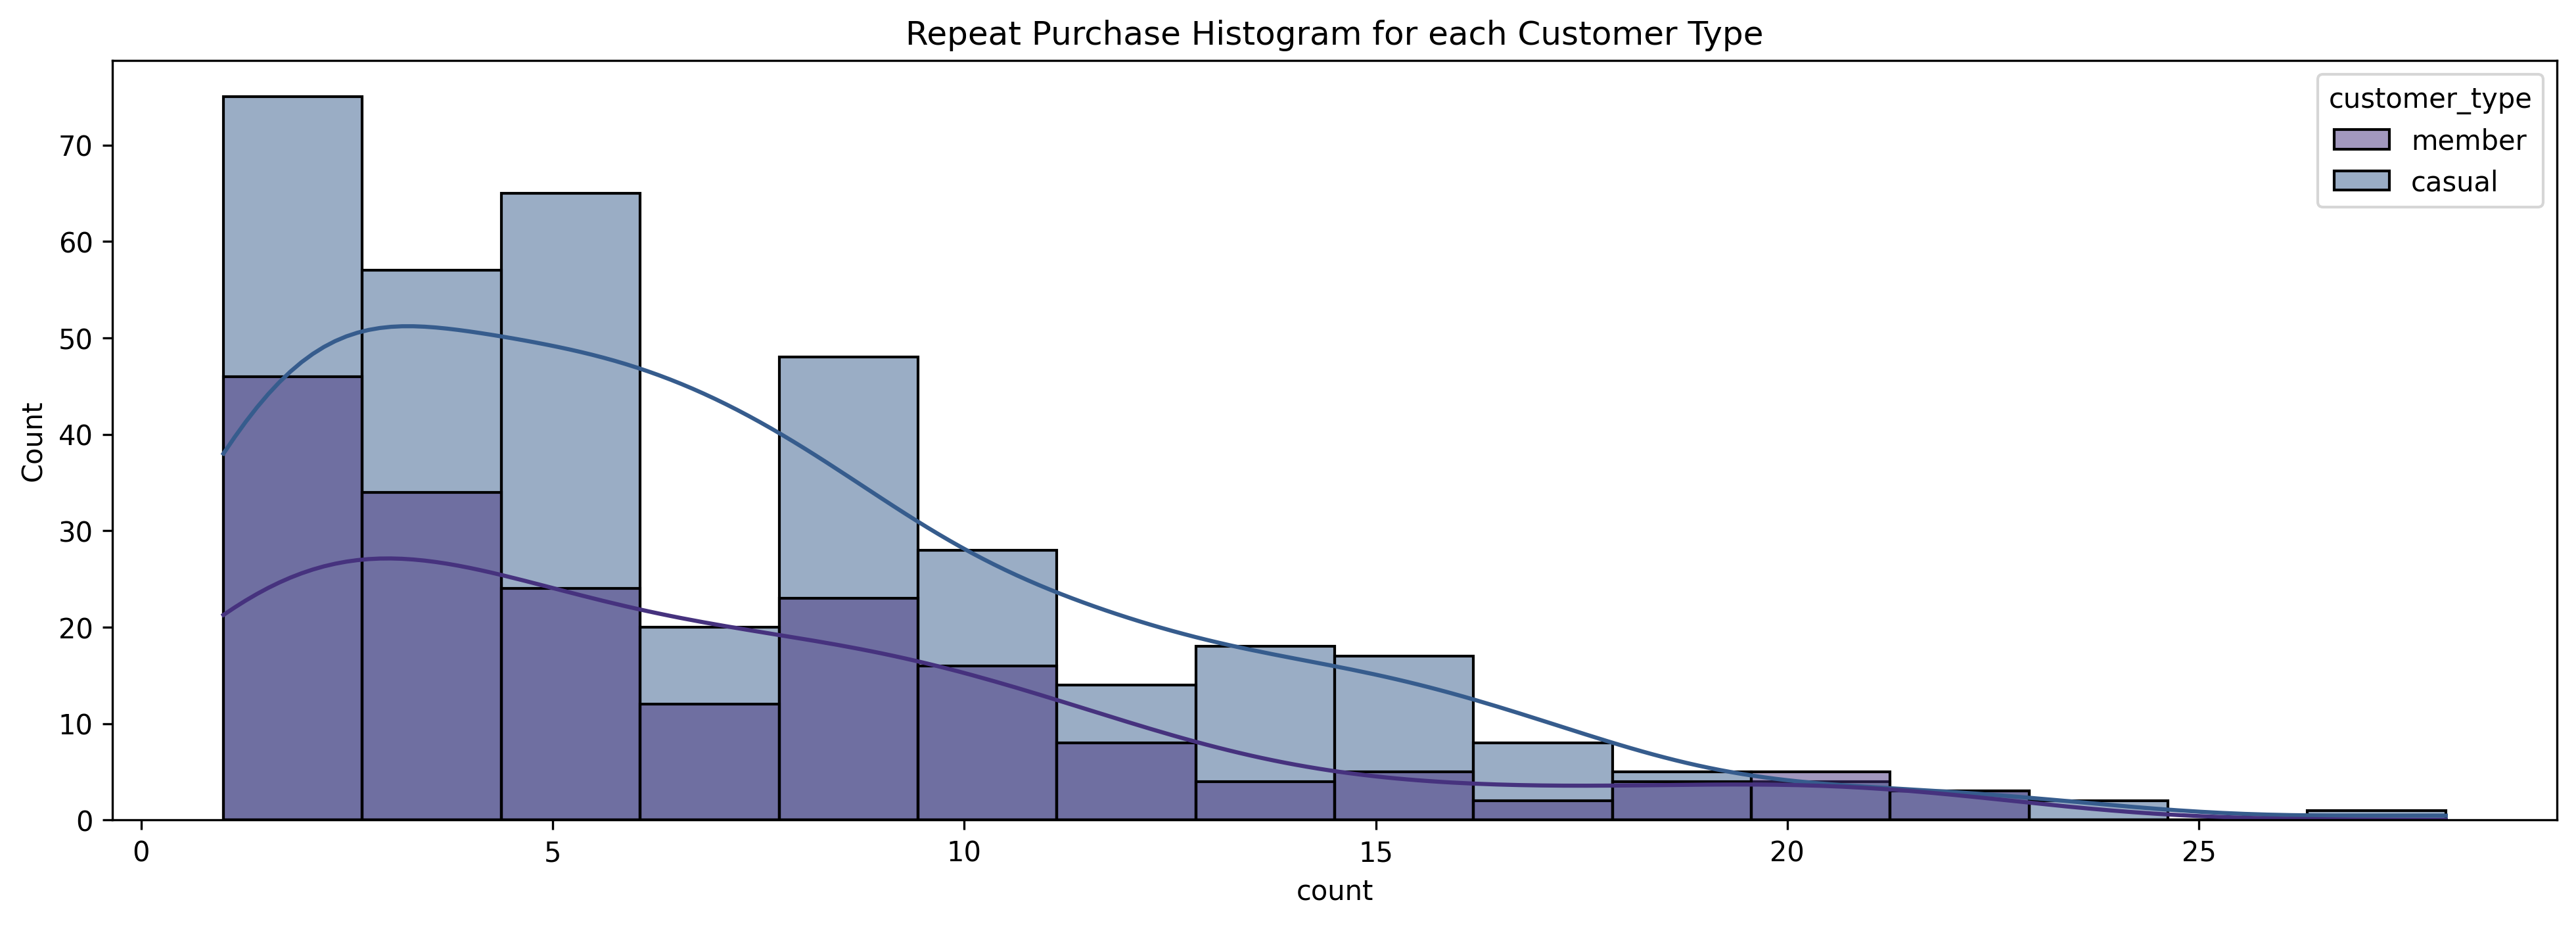

In [40]:
figure()
sns.histplot(repeat_purchase_table, x='count', hue='customer_type', kde=True)
plt.title('Repeat Purchase Histogram for each Customer Type')
plt.show()

## Customer Money Spent using Sum

In [41]:
stat_purchase_sum, p_purchase_sum = stats.mannwhitneyu(member_purchase_sum, casual_purchase_sum)

In [42]:
h0(p_purchase_sum)

'fail to reject'

In [43]:
customer_purchase_using_sum = ['member_purchase_sum',
                               'casual_purchase_sum',
                               'numeric',
                               stat_purchase_sum.round(3),
                               p_purchase_sum.round(3),
                               h0(p_purchase_sum)]

In [44]:
print(f"With p-value {p_purchase_sum:.3f} > 0.05, we fail to reject H0. There is no significant different mean between member and casual customers.")

With p-value 0.796 > 0.05, we fail to reject H0. There is no significant different mean between member and casual customers.


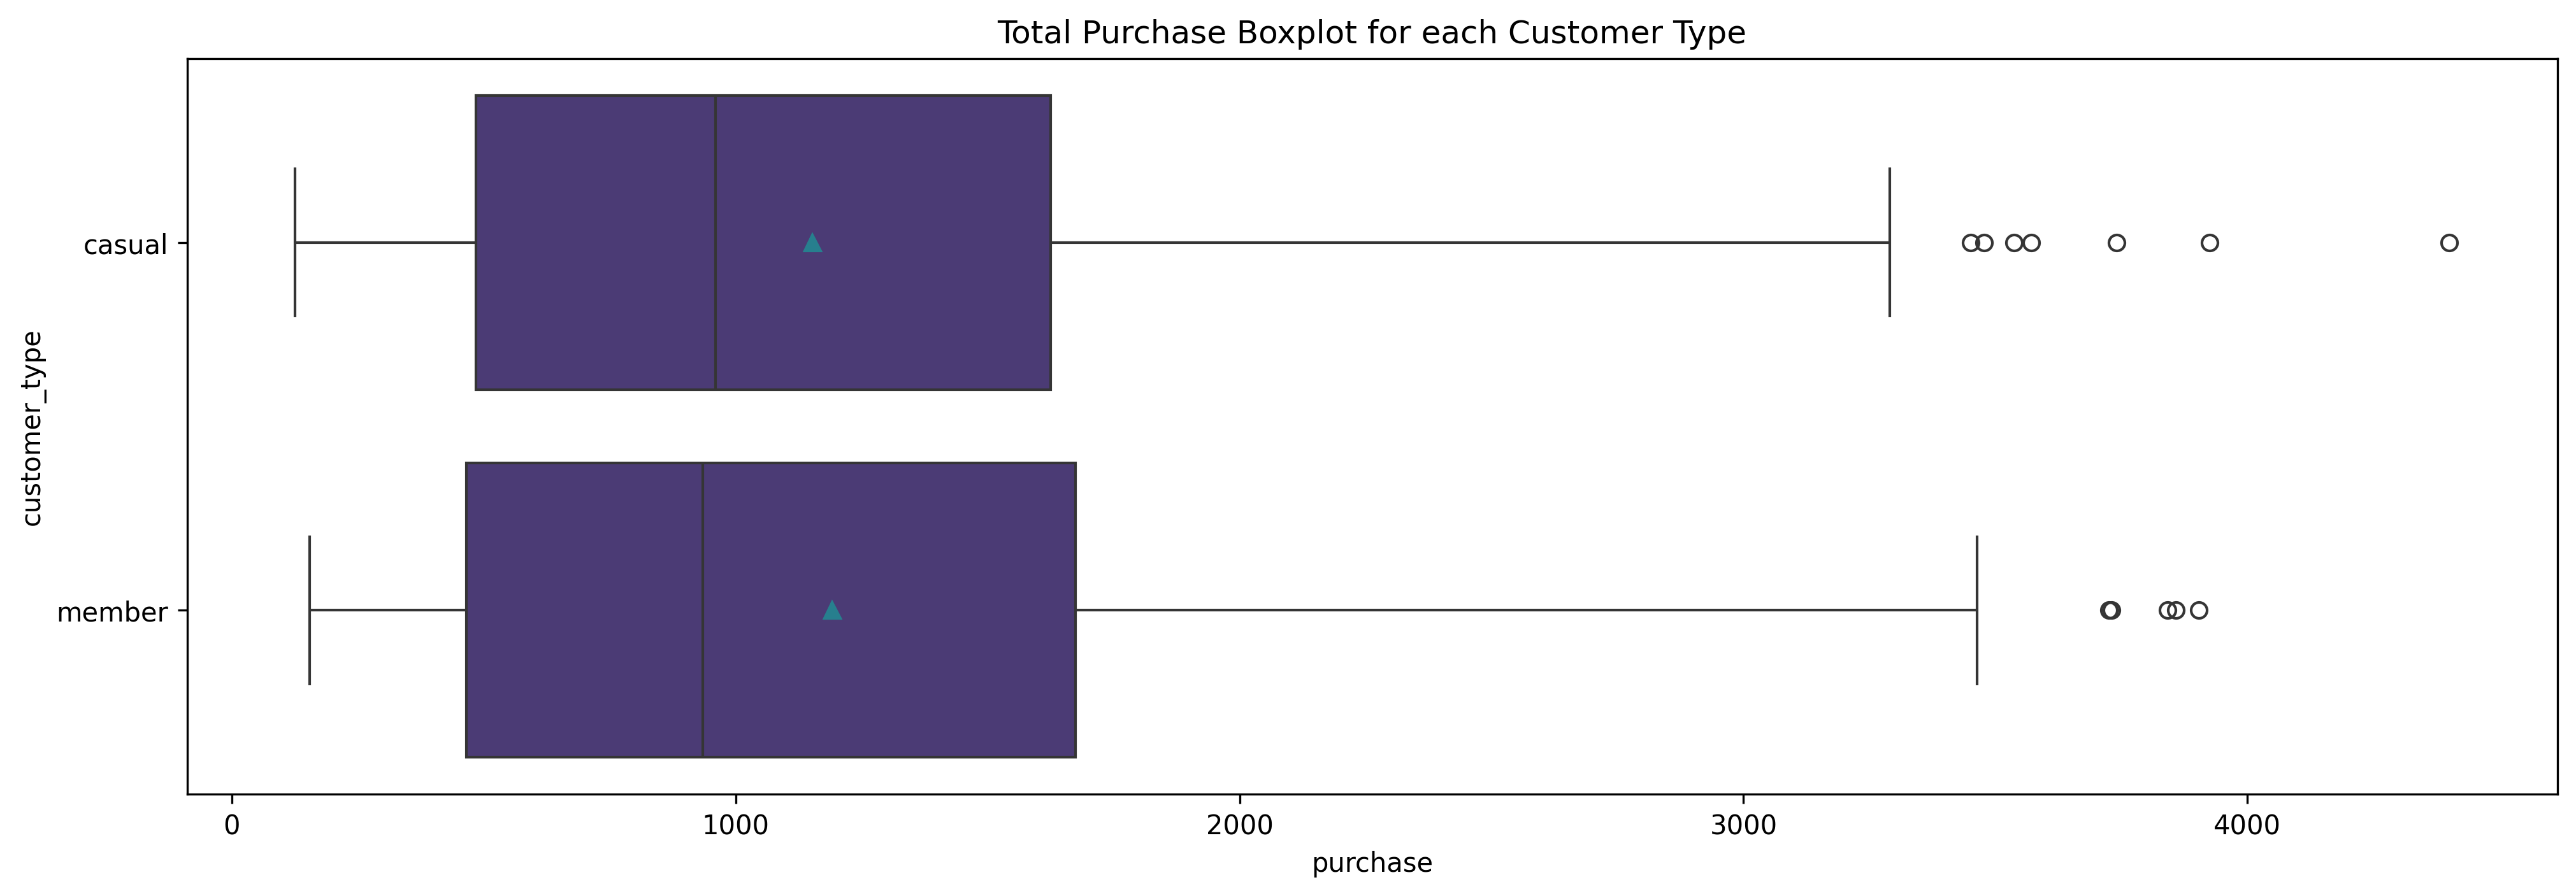

In [45]:
figure()
sns.boxplot(purchase_sum, x='purchase', y='customer_type', showmeans=True)
plt.title('Total Purchase Boxplot for each Customer Type')
plt.show()

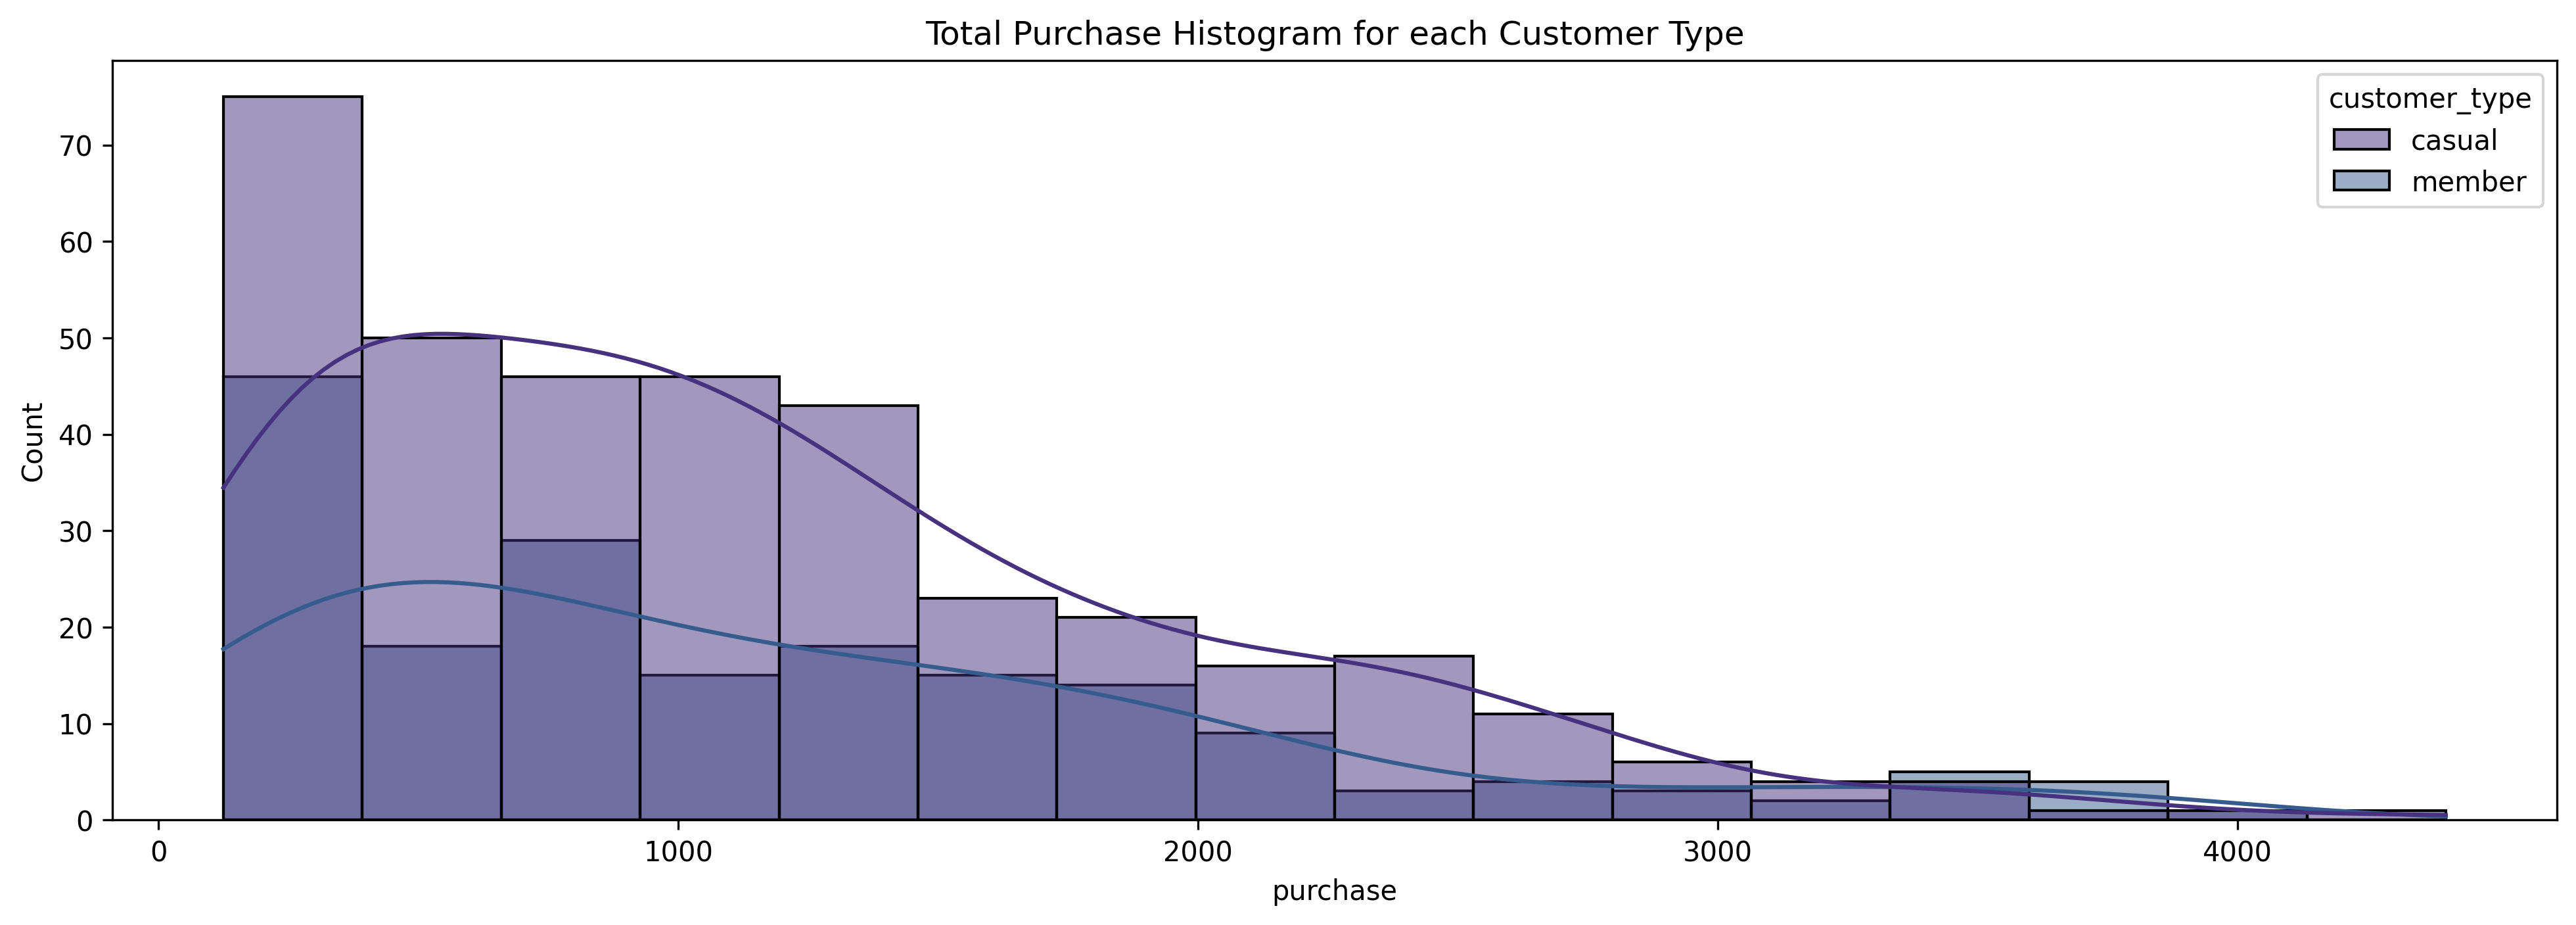

In [46]:
figure()
sns.histplot(purchase_sum, x='purchase', hue='customer_type', kde=True)
plt.title('Total Purchase Histogram for each Customer Type')
plt.show()

## Customer Money Spent using Mean

In [47]:
stat_purchase_mean, p_purchase_mean = stats.mannwhitneyu(member_purchase_mean, casual_purchase_mean)

In [48]:
h0(p_purchase_mean)

'accept to reject'

In [49]:
customer_purchase_using_mean = ['member_purchase_mean',
                                'casual_purchase_mean',
                                'numeric',
                                stat_purchase_mean.round(3),
                                p_purchase_mean.round(3),
                                h0(p_purchase_mean)]

In [50]:
print(f"With p-value {p_purchase_mean:.3f} < 0.05, we accept to reject H0. There is a significant different mean between member and casual customers.")

With p-value 0.000 < 0.05, we accept to reject H0. There is a significant different mean between member and casual customers.


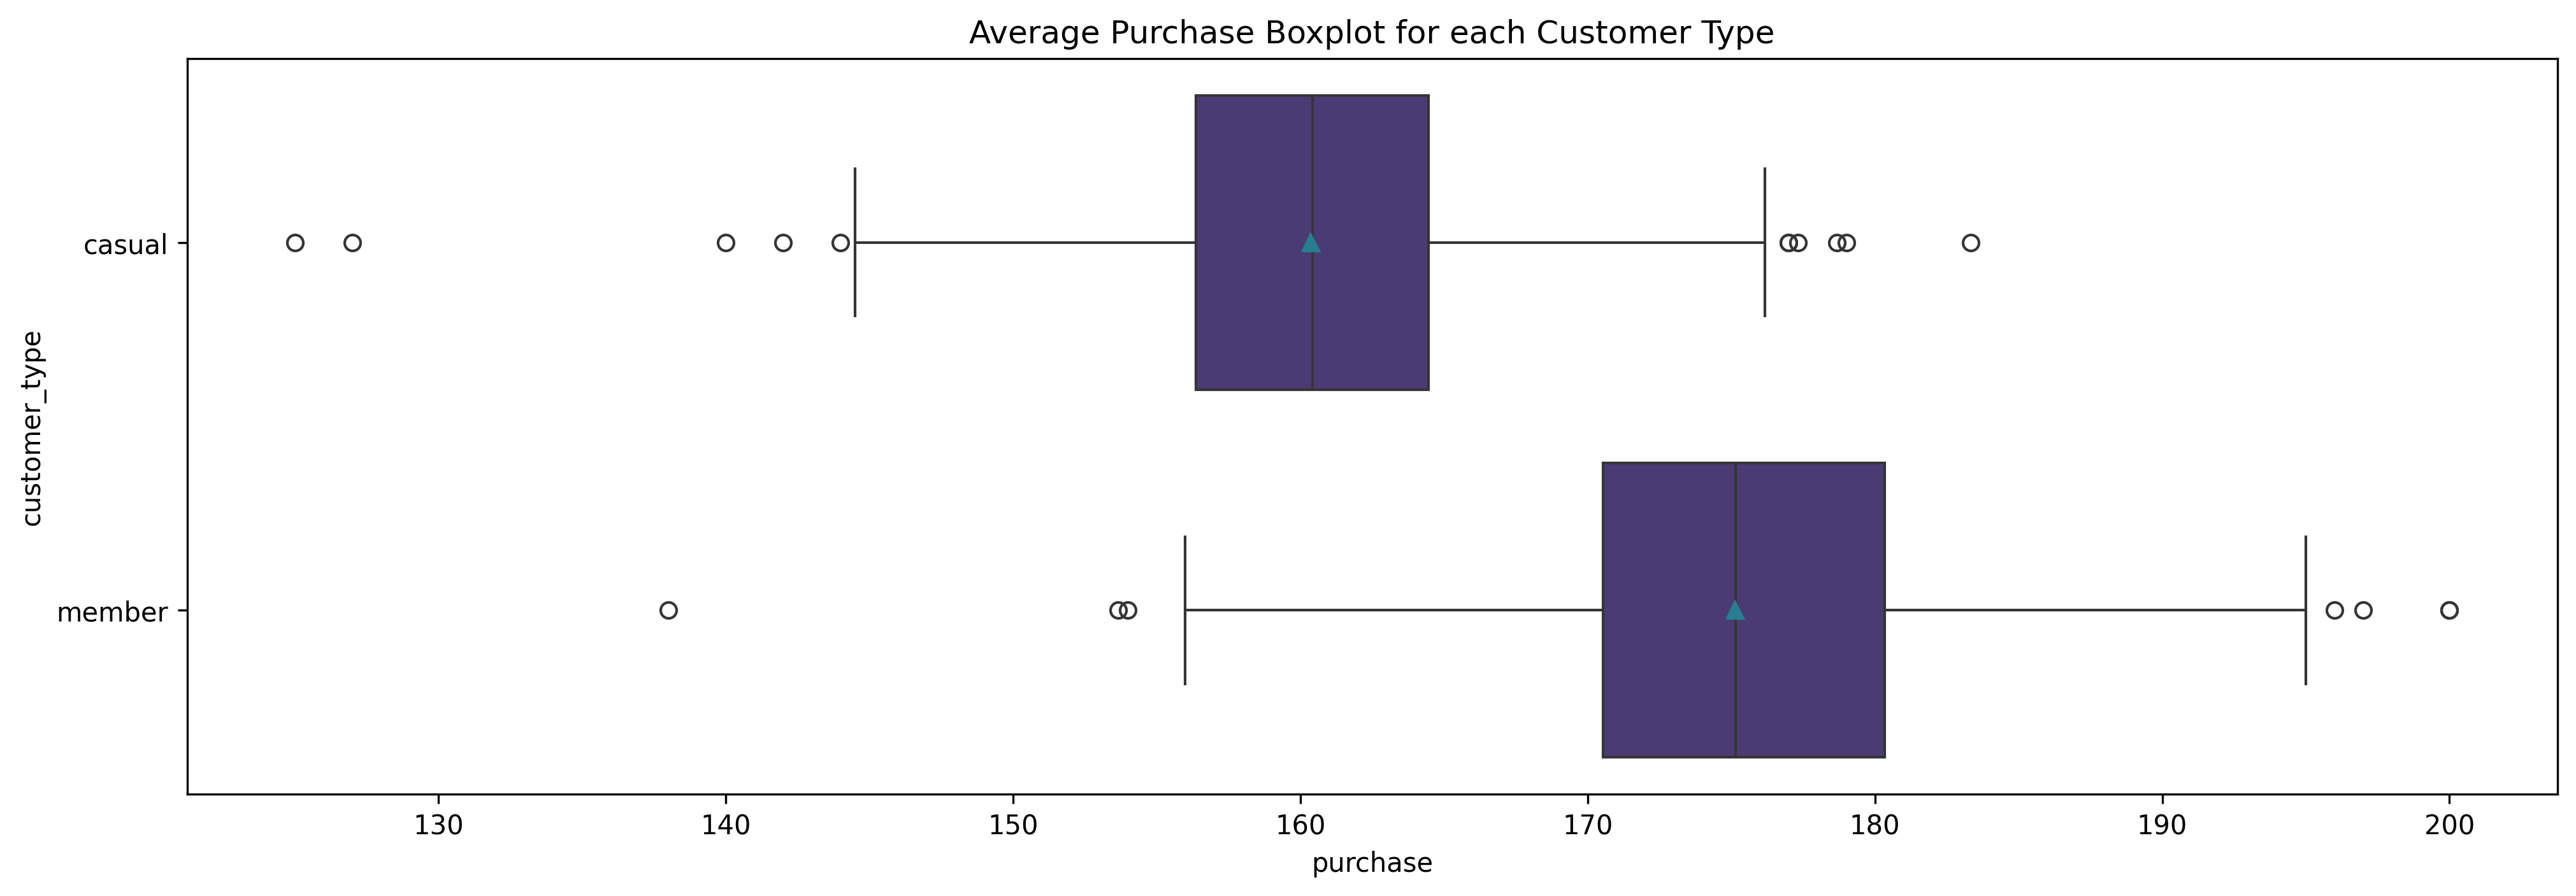

In [51]:
figure()
sns.boxplot(purchase_mean, x='purchase', y='customer_type', showmeans=True)
plt.title('Average Purchase Boxplot for each Customer Type')
plt.show()

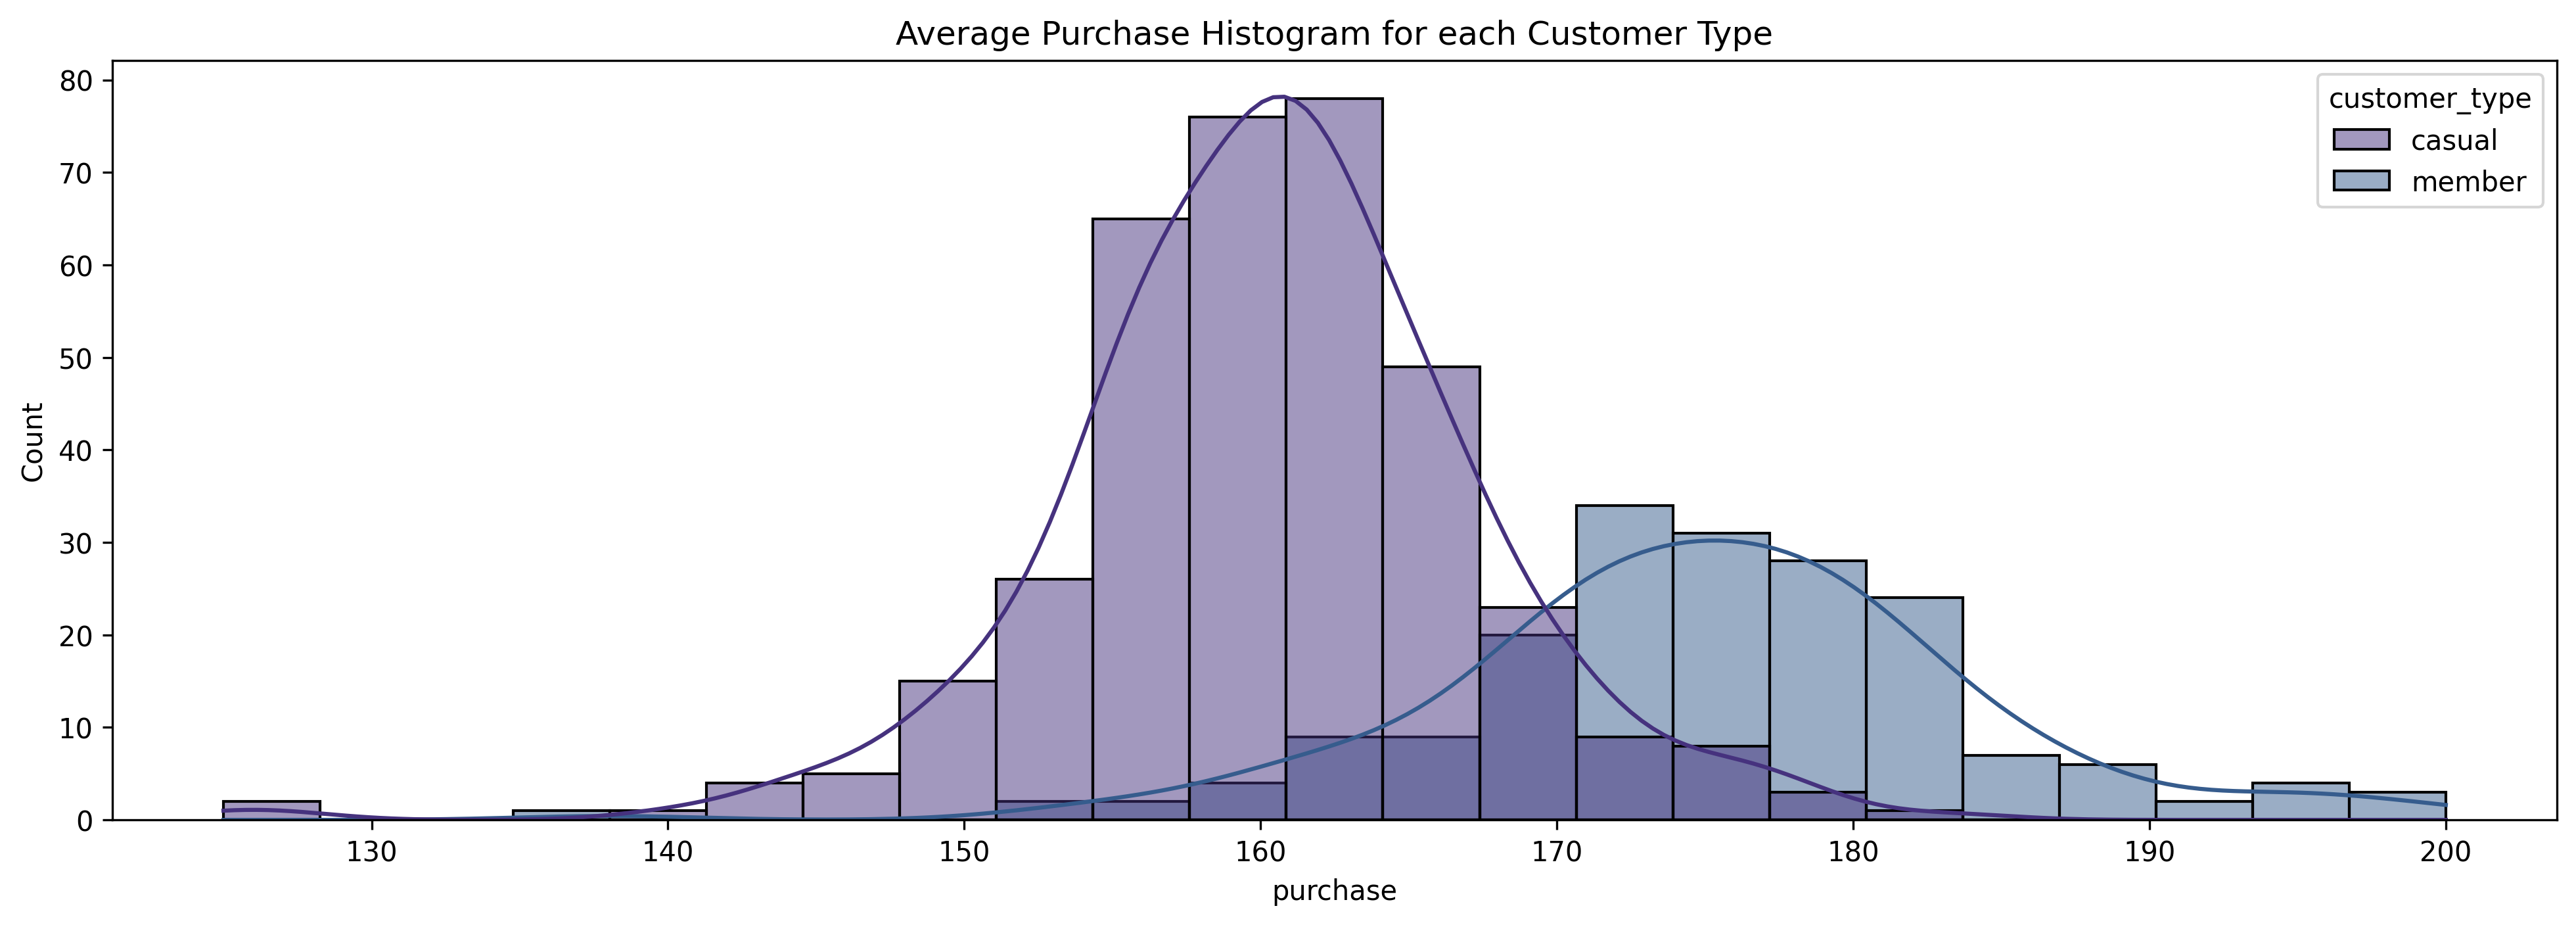

In [52]:
figure()
sns.histplot(purchase_mean, x='purchase', hue='customer_type', kde=True)
plt.title('Average Purchase Histogram for each Customer Type')
plt.show()

We can see that member customers are slightly bigger in purchasing power. Let's test using one sided greater testing.

In [53]:
print(f"{h0(stats.mannwhitneyu(member_purchase_mean, casual_purchase_mean, alternative='greater')[1])} H0 with p-value {stats.mannwhitneyu(member_purchase_mean, casual_purchase_mean, alternative='greater')[1]}")

accept to reject H0 with p-value 6.537869051977083e-58


After we change the alternative parameter into 'greater' from scipy.stats module, we get the result that member purchasing powers are greater than casual purchasing powers.

## Total Customer for Each City by Customer Type

In [54]:
stat, p, dof, exp = stats.chi2_contingency(crosstab)

In [55]:
h0(p=p)

'fail to reject'

In [56]:
customer_total = ['city',
                  'customer_type',
                  'categorical',
                  stat.round(3),
                  p.round(3),
                  h0(p)]

In [57]:
print(f"With p-value {p:.3f} > 0.05, we fail to reject H0. There is no significant association between city and customers that decide to become members.")

With p-value 0.498 > 0.05, we fail to reject H0. There is no significant association between city and customers that decide to become members.


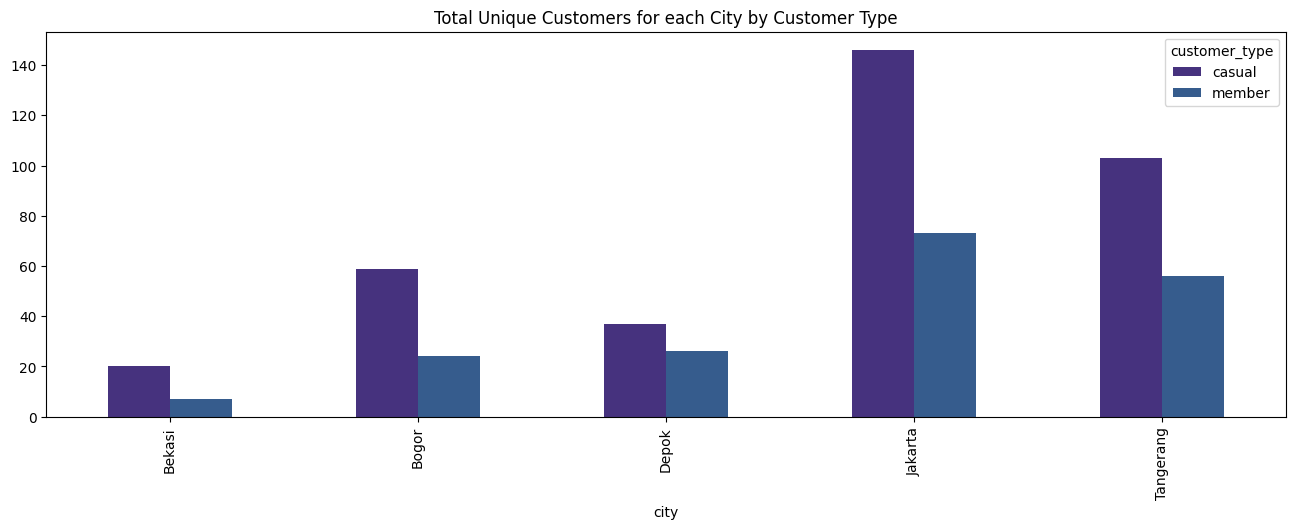

In [58]:
crosstab.plot(kind='bar', figsize=(16,5))
plt.title('Total Unique Customers for each City by Customer Type')
plt.show()

# Insights

## Interpretation and Reporting

In [59]:
all_results = pd.DataFrame({'customer_repeat_purchase': customer_repeat_purchase,
              'customer_purchase_using_sum': customer_purchase_using_sum,
              'customer_purchase_using_mean': customer_purchase_using_mean,
              'customer_total': customer_total}, index=['a','b','type','statistics','p-value','null hypothesis']).T
print(all_results)

                                                   a                       b  \
customer_repeat_purchase      member_repeat_purchase  casual_repeat_purchase   
customer_purchase_using_sum      member_purchase_sum     casual_purchase_sum   
customer_purchase_using_mean    member_purchase_mean    casual_purchase_mean   
customer_total                                  city           customer_type   

                                     type statistics p-value   null hypothesis  
customer_repeat_purchase          numeric    32079.0    0.29    fail to reject  
customer_purchase_using_sum       numeric    34403.5   0.796    fail to reject  
customer_purchase_using_mean      numeric    62217.5     0.0  accept to reject  
customer_total                categorical       3.37   0.498    fail to reject  


From the table above, we can see that:
- customer repeat purchases:
    - there are no significant differences in retention between member and casual customers.
    - it means, the loyalty program did not make retention rate increasing or make member customers repeat purchase more than casual customers.
- total customer purchases:
    - there are no significant differences in total purchase between member and casual customers.
    - it means, the total purchases for member customers are equal to the total purchases for casual customers.
- average customer purchases:
    - there is a significant difference in average customer purchases between member and casual customers.
    - we also try one sided greater test and the result is the purchasing power of member customers are greater than the purchasing power of casual customers.
    - it means, although the retention rate of member customers are low, the amount of purchases are bigger than casual customers everytime they make transaction.
- total member customers for each city compared to total casual customers:
    - there are no significant associations between city and whether they become member or casual customers.
    - it means, the loyalty program has no different impact for each city.

## Action

1. There is no difference in the total amount of spending between member and casual customer types.
    - Insight: Casual customers are able to contribute the same total spending as member customers.
    - Action: Focus on acquisition strategies to add casual customers to increase total shopping volume. For example, hold daily promotions or discounts to attract more casual customers.


2. There is a difference in the average amount of spending between member and casual customer types.
    - Insight: Member customers tend to spend more per transaction than casual customers.
    - Action: Improve the loyalty program to encourage more casual customers to become members. Provide incentives, such as special cashback for members or additional premium services.


3. There is no difference in purchasing frequency between member and casual customers.
    - Insight: Both types of customers have similar purchasing patterns in terms of frequency.
    - Action: Focus on upselling or cross-selling strategies, because shopping frequency cannot be changed significantly. For example, offer additional products or savings packages when purchasing.


4. There is no association between a particular city and the decision to become a member.
    - Insight: The decision to become a member is not influenced by the customer's geographic location.
    - Action: Carry out member marketing broadly, without needing to target specific cities. Use strategies based on customer behavior or preferences, such as targeting based on their interests (examples: exclusive access to certain amenities).

# Further Analysis

- do funnel analysis to understand which platform brings more customers.
- do market basket analysis to understand the correlation of each product so we can do upsell or cross-sell strategies.
- do survival analysis understand the customer lifetime value.